In [1]:
# import numpy as np
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, LSTM, Flatten, Bidirectional
# from tensorflow.keras.layers import Conv1D, TimeDistributed, MaxPooling1D
# from tensorflow.keras.layers import ConvLSTM2D


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statsmodels.api as sm
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import seaborn as sns

from scipy.stats import linregress
from scipy import signal #滤波等

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.feature_selection import SelectKBest, chi2

from scipy.stats import pearsonr

from sklearn import metrics

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression


from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
rawdata1 = pd.read_excel("Appendix1.xlsx", index_col="序号")
rawdata2 = pd.read_excel("Appendix2.xlsx", skiprows=[1], index_col="序号")

In [5]:
# rawdata1.to_csv("D:\OneDrive\A_Study\A5_FinaBigData\A4_HomeWorkPaper\data\Appendix1.csv",index=False,encoding="utf_8_sig")
# rawdata2.to_csv("D:\OneDrive\A_Study\A5_FinaBigData\A4_HomeWorkPaper\data\Appendix2.csv",index=False,encoding="utf_8_sig")

In [22]:
rawdata2

,总燃料量,总给水流量,总风量流量,锅炉烟气含氧量,锅炉给水温度1,B空预器出口二次风量2,A空预器出口二次风量2,#1角摆角燃烧器调节门反馈,#2角摆角燃烧器调节门反馈,#3角摆角燃烧器调节门反馈,...,E1风粉一次风速,E2风粉一次风速,E3风粉一次风速,E4风粉一次风速,E磨分离器风粉混合物温度2,F1风粉一次风速,F2风粉一次风速,F3风粉一次风速,F4风粉一次风速,F磨分离器风粉混合物温度2
序号,,,,,,,,,,,,,,,,,,,,,
1,114.905,591.139,879.357,4.339,242.437,254.591,301.484,48.756,99.786,50.389,...,30.840,24.990,23.906,28.303,60.414,39.049,20.771,25.488,29.919,58.071
2,114.839,592.197,883.463,4.328,242.487,252.777,301.439,48.810,99.786,50.389,...,30.717,25.167,24.040,28.433,60.414,39.562,21.171,25.570,30.053,58.118
3,115.120,594.290,879.675,4.318,242.536,250.157,301.484,48.764,99.779,50.389,...,30.846,24.759,23.862,28.725,60.414,39.656,21.360,25.773,30.898,58.118
4,115.163,596.104,882.536,4.318,242.487,252.865,301.439,48.802,99.779,50.343,...,31.179,25.042,24.170,28.598,60.414,39.442,21.370,26.114,30.299,58.164
5,115.543,596.114,890.153,4.318,242.437,254.864,301.576,48.825,99.786,50.389,...,30.758,25.027,24.011,28.488,60.461,39.415,21.897,24.864,29.706,58.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,111.734,610.550,790.006,3.257,247.656,209.657,329.214,98.970,98.818,0.839,...,31.129,23.782,23.828,27.805,63.416,40.069,21.638,26.145,30.965,65.951
4997,111.514,608.345,785.955,3.257,247.656,202.620,329.214,98.993,98.818,0.977,...,31.591,24.418,23.128,27.929,63.416,40.069,21.620,26.035,31.283,65.951
4998,111.694,608.933,784.269,3.257,247.706,203.164,329.214,98.993,98.818,0.816,...,31.813,24.957,23.007,27.824,63.416,40.069,21.677,26.192,31.609,65.951


## 1. 统计分析各个水冷壁管道的温度数据，并给出刻画这些温度时间序列数据变化情况的特征。


### 序列的统计特征
- 均值、标准差、k阶中心距、偏度/峰度、波峰波谷

In [23]:
# 均值、标准差、四分位数
desc_df = rawdata1.describe().T

# 斜率趋势
def trend(seq):
    idx = np.array(range(len(seq)))
    slope =  linregress(idx, seq.squeeze())[0]
    return slope

trend_df = pd.DataFrame(rawdata1.apply(trend)).rename(columns={0:"趋势斜率"})

# k阶中心矩(2阶)
def moment_k(seq, k=2):
    mean = seq.mean()
    moment_k = np.mean((seq-mean)**k)
    return moment_k

moment_k = pd.DataFrame(rawdata1.apply(moment_k)).rename(columns={0:"2阶中心距"})

# 波峰、波谷
peaks = dict()
troughs = dict()
for i in range(len(rawdata1.columns)):
    peaks[rawdata1.columns[i]] = len(signal.argrelextrema(np.array(rawdata1.iloc[:,i]),np.greater)[0])
    troughs[rawdata1.columns[i]] = len(signal.argrelextrema(np.array(rawdata1.iloc[:,i]),np.less)[0])

peaks_df = pd.DataFrame([troughs]).T
troughs_df = pd.DataFrame([troughs]).T
peak_df = peaks_df.rename(columns={0:"波峰"})
trough_df = troughs_df.rename(columns={0:"波谷"})

In [24]:
# 结果合并
all_describe_res = pd.concat([desc_df,trend_df,moment_k,trough_df,peak_df],axis=1)


outputpath='./all_describe_res.csv'
all_describe_res.to_csv(outputpath,sep=',',index=True,header=True,encoding = 'utf_8_sig')
all_describe_res

,count,mean,std,min,25%,50%,75%,max,趋势斜率,2阶中心距,波谷,波峰
管道1温度,5000.0,374.31092,21.451901,338.6,354.500,374.60,391.000,420.2,-0.006506,460.092029,157,157
管道2温度,5000.0,397.90878,16.852385,356.8,389.475,401.30,411.200,426.6,-0.002760,283.946073,106,106
管道3温度,5000.0,396.70924,10.675948,364.2,389.300,395.00,405.900,420.2,-0.000943,113.953079,139,139
管道4温度,5000.0,387.60632,16.375822,350.6,373.700,387.15,404.100,420.9,-0.004891,268.113908,255,255
管道5温度,5000.0,391.36178,12.977683,360.0,380.300,391.10,402.000,419.9,-0.002476,168.386569,229,229
管道6温度,5000.0,376.84336,16.656866,338.0,362.000,377.10,391.925,409.5,-0.004636,277.395688,117,117
管道7温度,5000.0,386.18564,16.021796,350.6,373.900,387.50,398.400,416.5,-0.003281,256.646598,121,121
管道8温度,5000.0,378.68452,17.210679,351.2,362.800,376.70,390.900,421.3,-0.004275,296.148240,778,778
管道9温度,5000.0,408.03364,17.706410,368.7,394.300,410.10,417.800,454.3,0.005998,313.454252,241,241
管道10温度,5000.0,424.90906,18.694077,378.8,412.400,423.20,441.800,465.4,0.007902,349.398632,192,192


### 时序图
- 所有序列的时序图：445摄氏度的参考线
- 个序列的时序子图：最大值和最小值参考位置

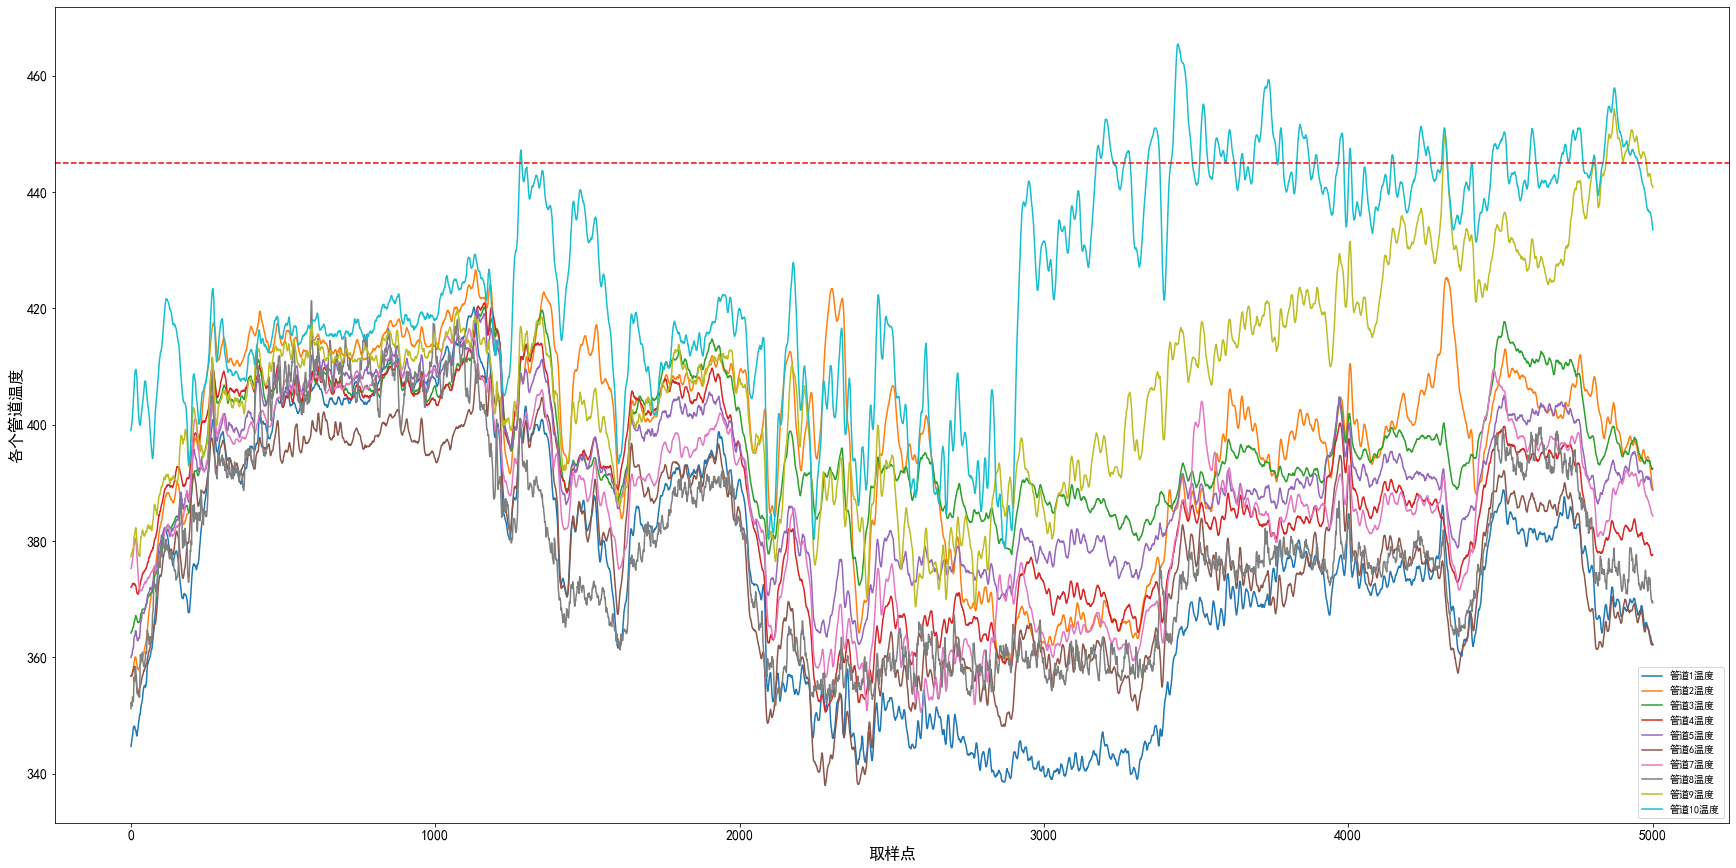

In [25]:
plt.figure(figsize=(30,15))
for col in rawdata1.columns:
    plt.plot(rawdata1.loc[:,col], label=col)

plt.axhline(445, c="red",ls="--")
plt.legend(loc="lower right")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("取样点",fontsize = 16)
plt.ylabel("各个管道温度",fontsize = 16)
plt.savefig("Time_Series_plot1.png",dpi=500, bbox_inches = "tight")
plt.show()

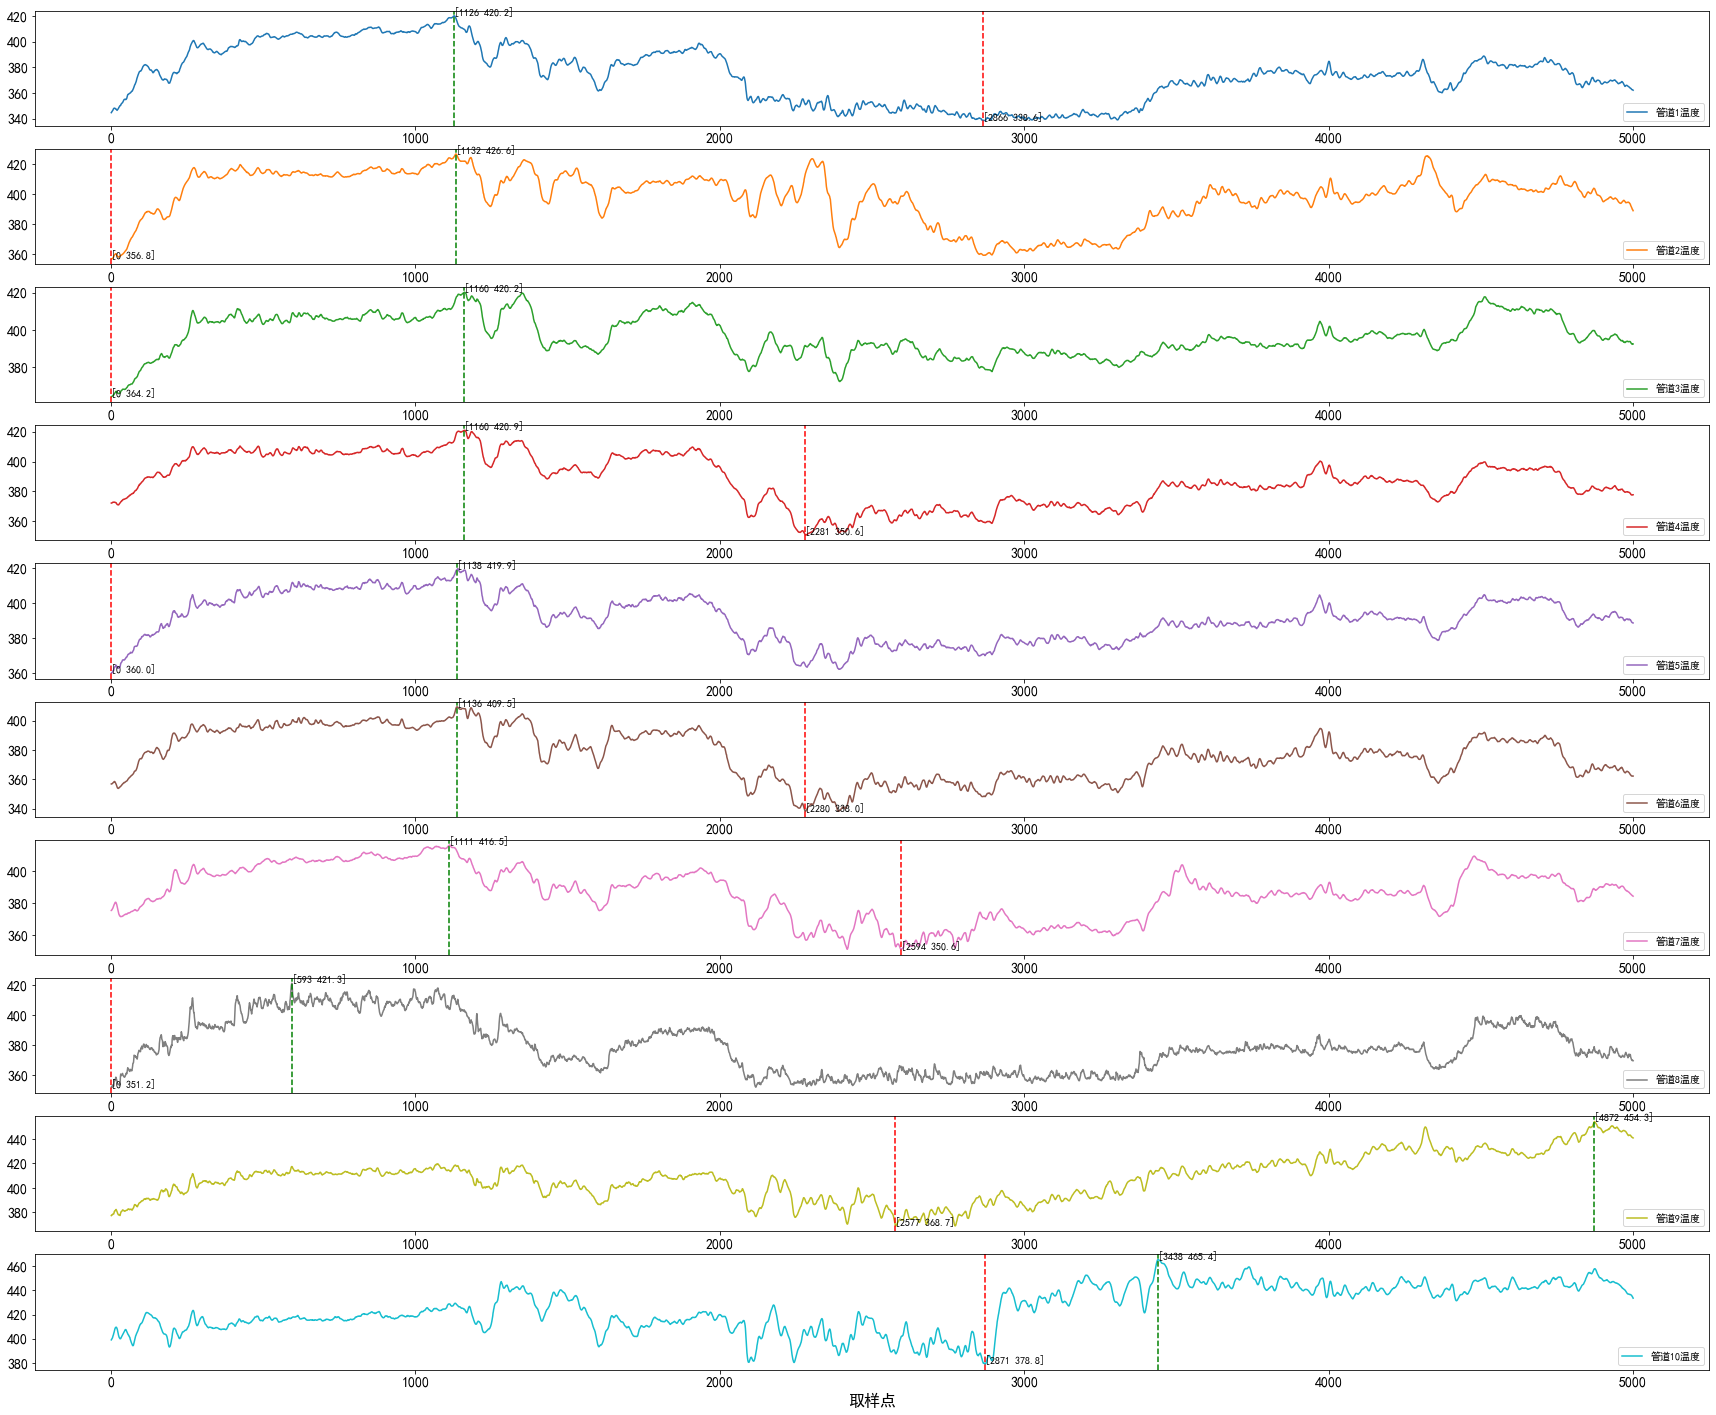

In [26]:

fig=plt.figure(figsize=(30,25))

colors=list(mcolors.TABLEAU_COLORS.keys()) #颜色

cols = rawdata1.columns
for i in range(len(cols)):

    max_indx=np.argmax(rawdata1.iloc[:,i])#max value index
    min_indx=np.argmin(rawdata1.iloc[:,i])#min value index
    
    ax=fig.add_subplot(10,1,i+1)
    ax.plot(rawdata1.iloc[:,i], label=cols[i],color=mcolors.TABLEAU_COLORS[colors[i]])
#     ax.axhline(445, color="red")

    # 绘制最大最小值参考线
    ax.axvline(max_indx, color="green",ls="--")
    ax.axvline(min_indx, color="red",ls="--")

    show_max='['+str(max_indx)+' '+str(rawdata1.iloc[max_indx,i])+']'
    ax.annotate(show_max,xytext=(max_indx,rawdata1.iloc[max_indx,i]),xy=(max_indx,rawdata1.iloc[max_indx,i]))
    
    show_min='['+str(min_indx)+' '+str(rawdata1.iloc[min_indx,i])+']'
    ax.annotate(show_min,xytext=(min_indx,rawdata1.iloc[min_indx,i]),xy=(min_indx,rawdata1.iloc[min_indx,i]))
    
    ax.legend(loc="lower right")
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
plt.xlabel("取样点",fontsize = 16)
plt.savefig("Time_Series_plot2.png",dpi=500, bbox_inches = "tight")
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1016: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


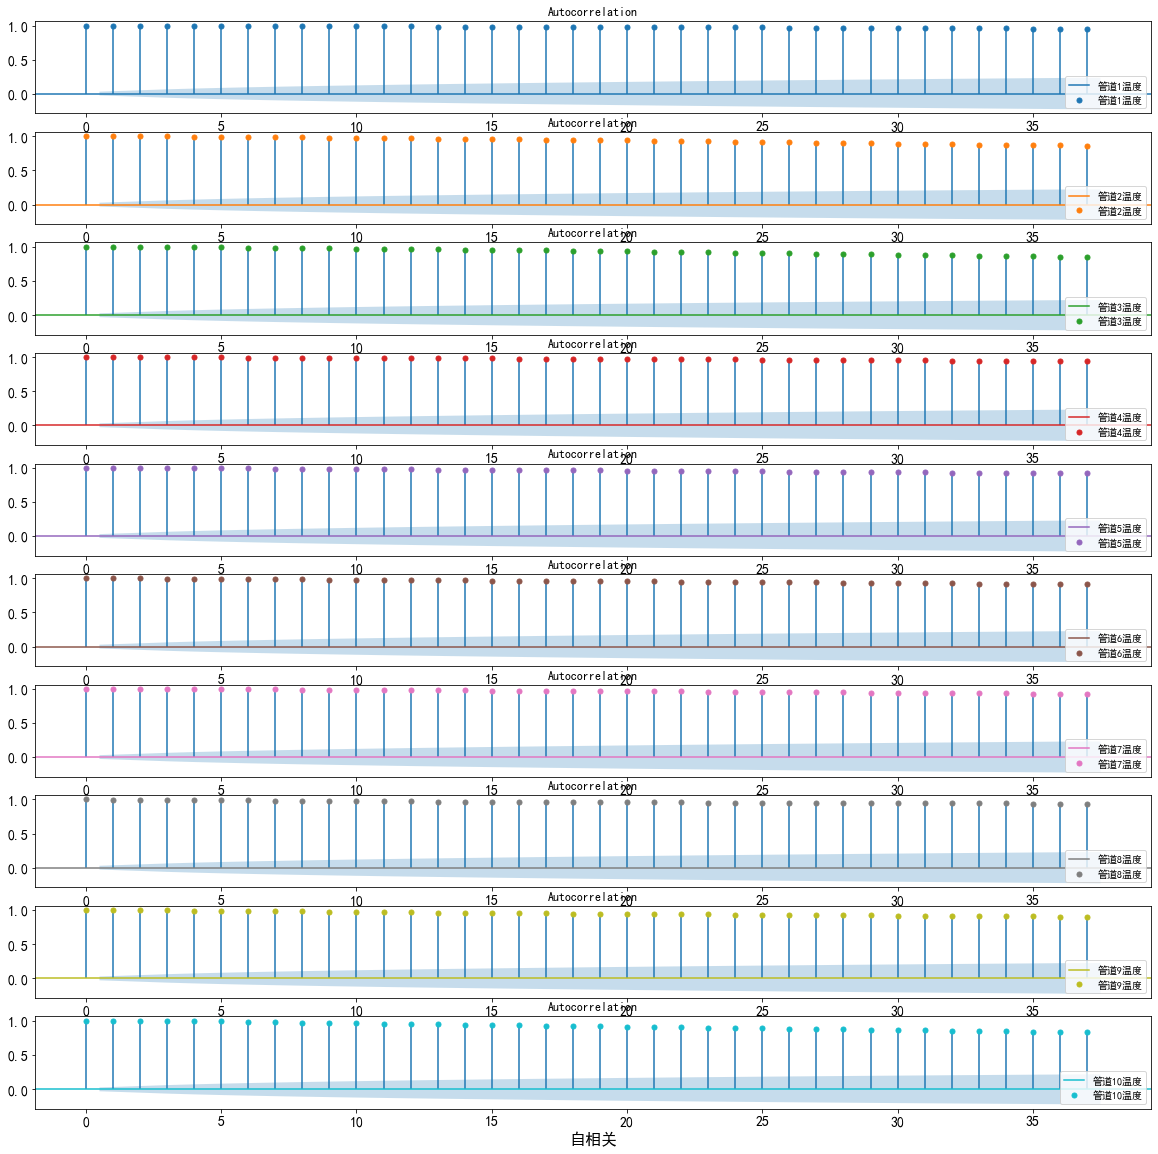

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


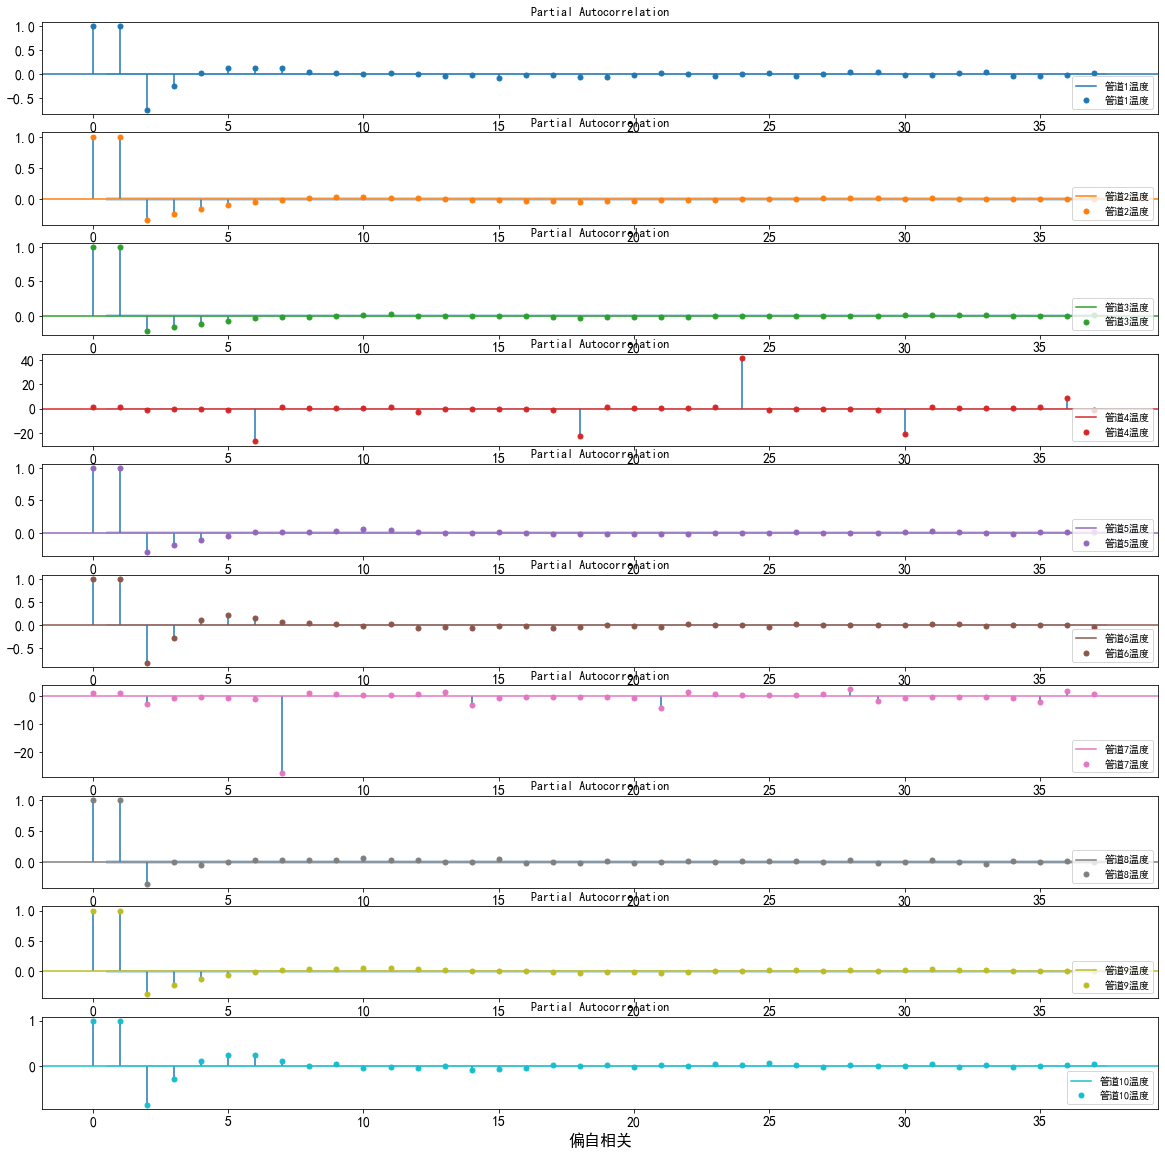

In [27]:
# 原始数据滞后40阶自相关系数
rawdata_acf_res = rawdata1.apply(sm.tsa.stattools.acf)
rawdata_acf_res.to_csv("rawdata_acf_result.csv",encoding="utf_8_sig")

# 原始数据滞后40阶偏自相关系数
rawdata_pacf_res = rawdata1.apply(sm.tsa.stattools.pacf)
rawdata_pacf_res.to_csv("rawdata_pacf_result.csv",encoding="utf_8_sig")

# 自相关图和偏自相关图

fig=plt.figure(figsize=(20,20))

colors=list(mcolors.TABLEAU_COLORS.keys()) #颜色

cols = rawdata1.columns
for i in range(len(cols)):  
    b = rawdata1.iloc[:,i]
    ax=fig.add_subplot(10,1,i+1)
    plot_acf(b, ax=ax, label=cols[i],color=mcolors.TABLEAU_COLORS[colors[i]])

    ax.legend(loc="lower right")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
plt.xlabel("自相关",fontsize = 16)
plt.savefig("自相关图.png",dpi=500, bbox_inches = "tight")
plt.show()



fig=plt.figure(figsize=(20,20))

colors=list(mcolors.TABLEAU_COLORS.keys()) #颜色

cols = rawdata1.columns
for i in range(len(cols)):    
    b = rawdata1.iloc[:,i]
    ax=fig.add_subplot(10,1,i+1)
    plot_pacf(b, ax=ax, label=cols[i],color=mcolors.TABLEAU_COLORS[colors[i]])

    ax.legend(loc="lower right")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
plt.xlabel("偏自相关",fontsize = 16)
plt.savefig("偏自相关图.png",dpi=500, bbox_inches = "tight")
plt.show()

## 2.	请对附件1中10个水冷壁管道的温度数据曲线进行评价，确定其中的最优工作曲线和最差工作曲线。

- 评价标准：稳定性
- 差分

In [28]:
# 原始数据平稳性检验

#数据平稳性检测
# def judge_stationarity(data_sanya_one):
#     dftest = sm.tsa.stattools.adfuller(data_sanya_one)
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     stationarity = "是"
#     for key, value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value 
#         if dftest[0] > value:
#                 stationarity = "否"
#     print(dfoutput)
#     print("是否平稳(是/否): %s" %(stationarity))
#     return stationarity

# rawdata1.apply(judge_stationarity)

# 用Dickey-Fuller test检验序列是否平稳
dftest = rawdata1.apply(sm.tsa.stattools.adfuller).T.drop(5,axis=1).rename(columns={0:"Test Statistic",
                                                                                    1:'P-Value',
                                                                                    2:'Lags',
                                                                                    3:'Number',
                                                                                    4:"Critical Value"})
dfoutput = dftest.drop("Critical Value", axis=1)
dfoutput["stationarity"] = dfoutput["P-Value"].apply(lambda x : x < 0.05)
dfoutput.to_csv("./rawdata_stationarity_test_result.csv",encoding="utf_8_sig")
dfoutput

,Test Statistic,P-Value,Lags,Number,stationarity
管道1温度,-2.13492,0.230707,19,4980,False
管道2温度,-3.99027,0.00146235,18,4981,True
管道3温度,-3.88804,0.00212468,16,4983,True
管道4温度,-2.33704,0.160299,17,4982,False
管道5温度,-2.64218,0.0845889,16,4983,False
管道6温度,-2.64559,0.0839362,16,4983,False
管道7温度,-2.41457,0.137667,15,4984,False
管道8温度,-2.09904,0.2449,14,4985,False
管道9温度,-1.88406,0.339598,27,4972,False
管道10温度,-3.37694,0.0117705,26,4973,True


10个原序列中，管道2，3，10序列通过平稳性检验，即原序列就是平稳的时间序列。

但是管道10温度的峰值超过限制阈值。

In [29]:
diff_data1 = rawdata1.diff().dropna()

In [30]:
# 1阶差分后数据平稳性检验

# 用Dickey-Fuller test检验序列是否平稳
dftest2 = diff_data1.apply(sm.tsa.stattools.adfuller).T.drop(5,axis=1).rename(columns={0:"Test Statistic",
                                                                                    1:'P-Value',
                                                                                    2:'Lags',
                                                                                    3:'Number',
                                                                                    4:"Critical Value"})
dfoutput2 = dftest2.drop("Critical Value", axis=1)
dfoutput2["stationarity"] = dfoutput2["P-Value"].apply(lambda x : x < 0.05)
dfoutput2.to_csv("./diffdata_stationarity_test_result.csv",encoding="utf_8_sig")
dfoutput2

,Test Statistic,P-Value,Lags,Number,stationarity
管道1温度,-11.6508,2.03909e-21,18,4980,True
管道2温度,-11.3074,1.26323e-20,19,4979,True
管道3温度,-12.2534,9.42802e-23,15,4983,True
管道4温度,-11.8355,7.81024e-22,16,4982,True
管道5温度,-15.1194,7.49813e-28,15,4983,True
管道6温度,-13.5511,2.40842e-25,15,4983,True
管道7温度,-13.6195,1.8083e-25,14,4984,True
管道8温度,-21.5674,0,13,4985,True
管道9温度,-14.6706,3.27086e-27,28,4970,True
管道10温度,-13.3074,6.85426e-25,25,4973,True


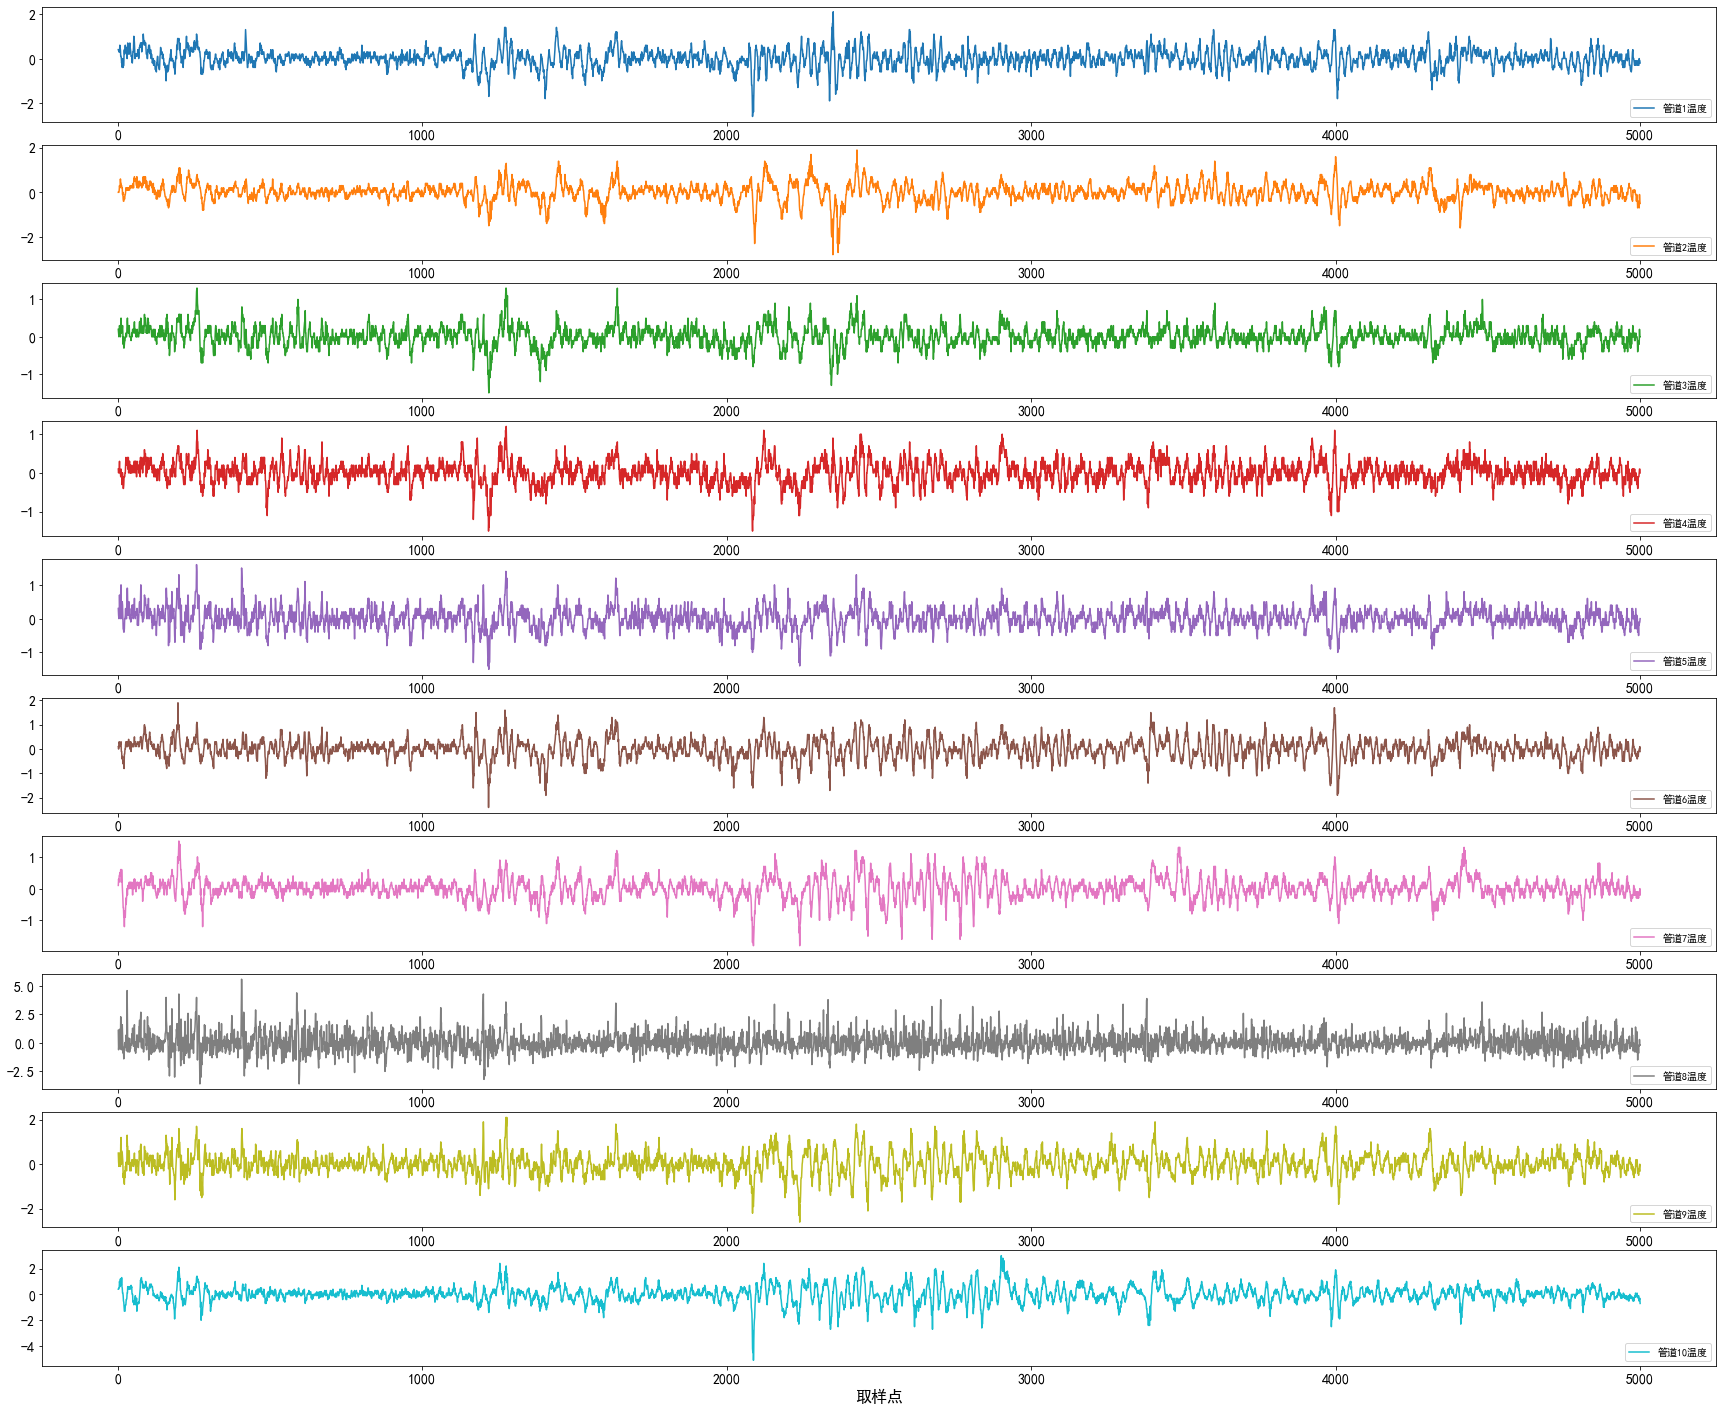

In [31]:

fig=plt.figure(figsize=(30,25))

colors=list(mcolors.TABLEAU_COLORS.keys()) #颜色

cols = diff_data1.columns
for i in range(len(cols)):

    ax=fig.add_subplot(10,1,i+1)
    ax.plot(diff_data1.iloc[:,i], label=cols[i],color=mcolors.TABLEAU_COLORS[colors[i]])
    
    ax.legend(loc="lower right")
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
plt.xlabel("取样点",fontsize = 16)
plt.savefig("Time_Diff_Series.png",dpi=500, bbox_inches = "tight")
plt.show()

## 3.	请利用附件1和附件2中的数据，分别建立10个水冷壁管道温度变化规律的数学模型，并对模型效果进行评价。

In [32]:
# 合并数据集,划分训练集
data_all = rawdata1.join(rawdata2)

X_data = data_all.iloc[:,10:].fillna(method="ffill")
Y_data = data_all.iloc[:,:10]

In [33]:
# 线性拟合系数确定重要性（此处可以考虑其他方法：树模型、主成分，相关系数等）
model = LinearRegression()
linear_coefs = dict()
for i in range(len(Y_data.columns)):
    model.fit(X_data, Y_data.iloc[:,i])
    linear_coefs[Y_data.columns[i]] = model.coef_
importance_df = pd.DataFrame(linear_coefs, index=X_data.columns)  

importance_df.to_csv("./importance_linear_coef_allfeature.csv",encoding="utf_8_sig")


# 变量选择
importance_df["mean"] = importance_df.mean(axis=1)
select_feature = importance_df.loc[np.abs(importance_df["mean"]) > 0.5,:].drop("mean",axis=1)
X_newdata = X_data[select_feature.index.to_list()]
X_newdata

,锅炉给水温度1,#1角UC层二次风调节挡板位置反馈,#3角UC层二次风调节挡板位置反馈,#1角UB层二次风调节挡板位置反馈,#1角UA层二次风调节挡板位置反馈,#1角EE层二次风调节挡板位置反馈,#2角DE层二次风调节挡板位置反馈,#3角DE层二次风调节挡板位置反馈,#3角A层二次风调节挡板位置反馈,#1角AA层二次风调节挡板位置反馈,...,E给煤机给煤量反馈信号,D磨入口热一次风电调挡板位置,省煤器出口温度2,主汽压力,再热蒸汽压力,水煤比,C4风粉一次风速,C磨分离器风粉混合物温度2,D磨分离器风粉混合物温度2,F1风粉一次风速
序号,,,,,,,,,,,,,,,,,,,,,
1,242.437,77.174,77.037,22.620,22.620,17.615,16.478,17.348,2.563,2.632,...,24.695,98.993,266.324,12.235,1.859,4.322,41.505,64.871,65.482,39.049
2,242.487,77.205,77.037,22.612,22.612,17.524,16.478,17.356,2.609,2.647,...,24.640,98.993,266.417,12.235,1.859,4.325,41.505,64.824,65.482,39.562
3,242.536,77.205,77.037,22.589,22.589,17.524,16.448,17.455,2.609,2.647,...,24.677,98.993,266.417,12.199,1.859,4.336,41.505,64.824,65.482,39.656
4,242.487,77.075,77.037,22.620,22.620,17.524,16.478,17.424,2.624,2.685,...,24.855,98.993,266.511,12.171,1.859,4.348,41.505,64.824,65.482,39.442
5,242.437,77.144,77.037,22.612,22.612,17.524,16.471,17.432,2.632,2.647,...,24.828,98.993,266.605,12.171,1.859,4.337,41.505,64.777,65.482,39.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,247.656,79.638,79.738,69.820,69.820,16.837,18.493,30.577,4.577,4.730,...,28.132,99.268,270.526,14.506,2.027,4.586,41.804,69.663,67.830,40.069
4997,247.656,79.585,79.738,69.797,69.797,16.875,18.493,30.600,4.509,4.661,...,28.169,99.268,270.526,14.494,2.028,4.586,41.807,69.663,67.830,40.069
4998,247.706,79.562,79.707,69.797,69.797,16.852,18.493,30.600,4.493,4.631,...,28.132,99.268,270.339,14.480,2.028,4.583,41.796,69.663,67.783,40.069


In [40]:
importance_df

,管道1温度,管道2温度,管道3温度,管道4温度,管道5温度,管道6温度,管道7温度,管道8温度,管道9温度,管道10温度,mean
总燃料量,0.626769,-0.065989,0.046323,0.416744,0.311847,0.651234,0.431109,0.192837,0.429462,0.651810,0.369215
总给水流量,-0.000933,-0.007865,0.002403,0.002261,0.001887,0.001655,0.003518,0.002176,0.001561,0.004671,0.001133
总风量流量,-0.045072,-0.048671,-0.019922,0.008277,0.004078,0.013533,0.040023,-0.035545,0.016336,-0.051863,-0.011883
锅炉烟气含氧量,-0.017305,-0.173372,-0.028170,-0.095613,-0.079567,-0.059749,0.018989,-0.119542,-0.294741,-0.371907,-0.122098
锅炉给水温度1,1.933560,2.016808,0.290500,0.901400,0.627465,1.218704,1.253446,0.217156,1.690689,1.463542,1.161327
...,...,...,...,...,...,...,...,...,...,...,...
F1风粉一次风速,-1.055846,4.772678,3.882569,1.535685,1.564329,2.092145,-3.728315,0.550253,-2.247063,9.325521,1.669196
F2风粉一次风速,0.011783,0.190112,0.115130,0.139028,0.096253,0.241492,0.178600,-0.006434,-0.069509,0.261989,0.115844
F3风粉一次风速,0.381042,0.514597,0.119912,0.050008,0.027371,0.077950,-0.141504,0.231681,-0.266484,0.641514,0.163609
F4风粉一次风速,0.101394,0.319417,0.007300,-0.060529,-0.044017,-0.134763,0.045126,-0.084079,0.223155,0.354342,0.072735


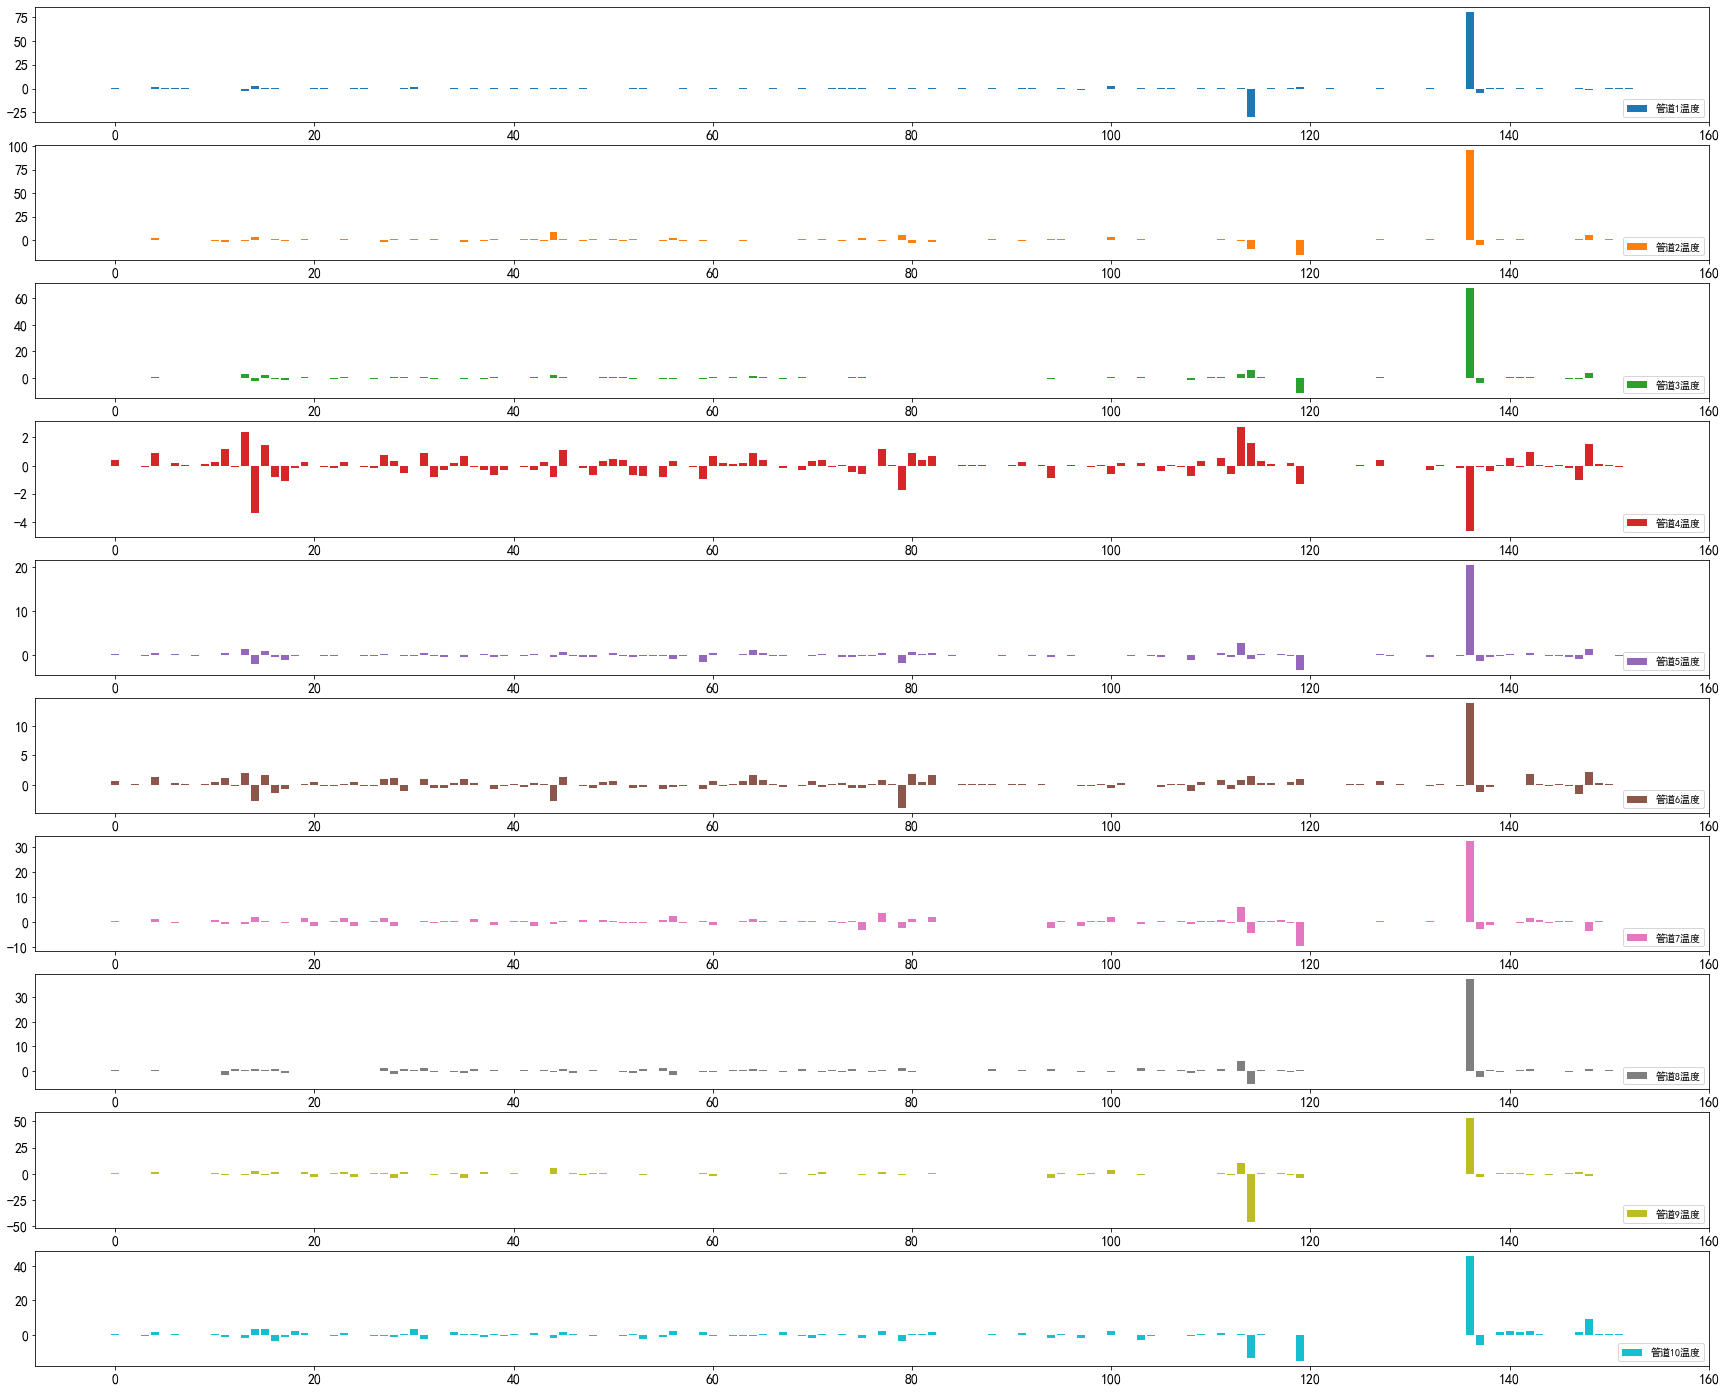

In [41]:
# 变量重要性的可视化
fig=plt.figure(figsize=(30,25))

colors=list(mcolors.TABLEAU_COLORS.keys()) #颜色

cols = importance_df.drop("mean",axis=1).columns
for i in range(len(cols)):

    ax=fig.add_subplot(10,1,i+1)
    ax.bar(range(len(importance_df)),importance_df.iloc[:,i],label=cols[i],color=mcolors.TABLEAU_COLORS[colors[i]])

    ax.legend(loc="lower right")
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
plt.savefig("importance_bar_allfeature.png",dpi=500, bbox_inches = "tight")
plt.show()

Linear Regression : [0.97551129 0.97512149 0.97393994 0.97665329 0.97662821 0.97528709
 0.97508824 0.97637268 0.97610397 0.97466073 0.97135651 0.97551227
 0.97428514 0.97301508 0.97729596 0.9753097  0.97670951 0.97565421
 0.97216842 0.97640178]
Ridge Regression : [0.97503232 0.97482218 0.97335367 0.9760004  0.97656683 0.97498526
 0.97446823 0.97600984 0.975638   0.97417387 0.96984252 0.97515209
 0.97336119 0.97191874 0.97669808 0.97507495 0.97638309 0.97526357
 0.97051295 0.97631709]
Lasso Regression : [0.95816696 0.96126392 0.9562158  0.96233727 0.96163085 0.96054657
 0.96089153 0.96066514 0.96222378 0.96125784 0.96290307 0.95981994
 0.96219293 0.96184027 0.9637064  0.9616604  0.96179371 0.96278707
 0.96245669 0.96296517]
Random Forest : [0.99744891 0.99811403 0.9960615  0.99816442 0.99803882 0.99707904
 0.99822138 0.99801103 0.99827102 0.99798897 0.99801379 0.99742361
 0.99820056 0.99753582 0.99839211 0.99819932 0.99810493 0.9982083
 0.9979129  0.99779389]
XGBoost : [0.99648543 0.997

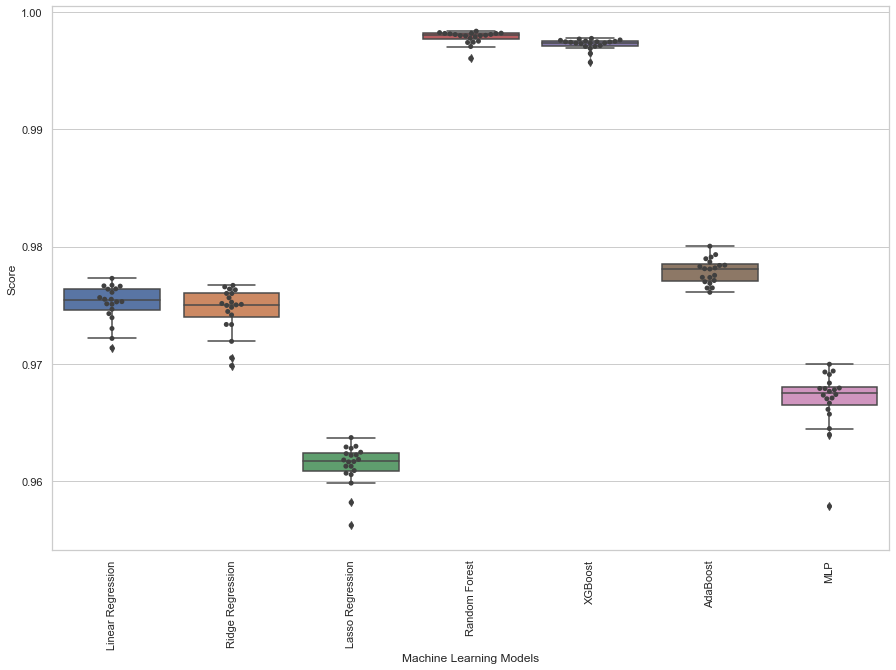

线性回归系数：
 [  1.421   0.711  -0.579   0.023   0.023  -0.73    2.954  -1.311  -0.805
   5.16   -4.275  -0.44   -2.841   1.802  -5.537   0.522   2.266  -2.768
 -15.116   6.175   0.07   -0.739   6.965]
Training set score:0.9819003437

Test set score:0.5015104405

Training set MSE:11.60

Test set MSE:19.10



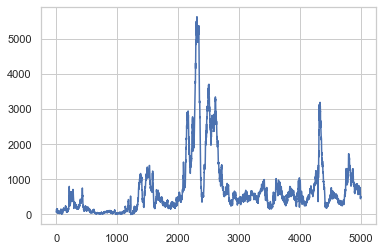

Train RMSE: 3.4053
Test RMSE: 4.3703


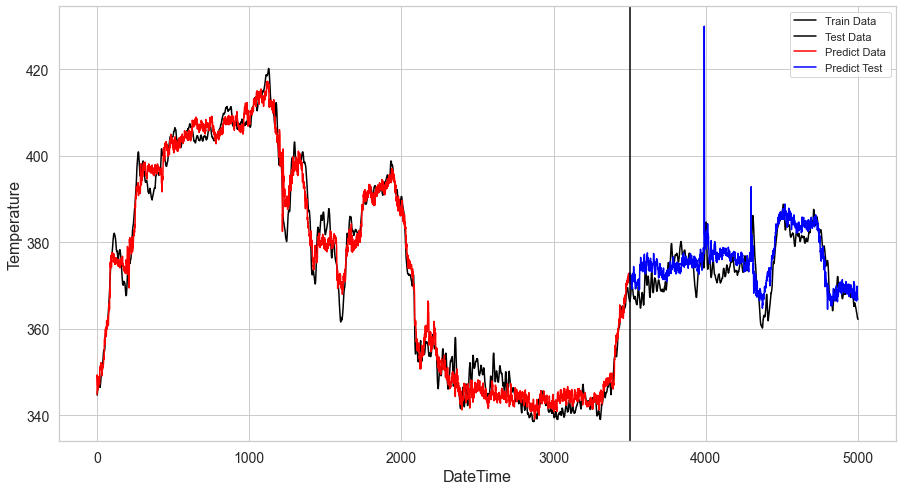

Linear Regression : [0.81184969 0.81126513 0.80234084 0.80483022 0.81351948 0.80941716
 0.78086847 0.81371047 0.80852348 0.79127014 0.80555777 0.81038321
 0.79749128 0.79216634 0.81017688 0.80784169 0.79484382 0.80891998
 0.80502153 0.81257223]
Ridge Regression : [0.80676837 0.80979262 0.79810688 0.80071312 0.81114303 0.80908191
 0.77583821 0.81153726 0.80354406 0.7863505  0.79920637 0.80798381
 0.79106993 0.78663313 0.80755453 0.80411896 0.79177698 0.80418207
 0.79763568 0.81052956]
Lasso Regression : [0.75649258 0.7645992  0.75130399 0.76085928 0.76615019 0.767171
 0.74264906 0.76587302 0.75871497 0.74180721 0.76566988 0.75772686
 0.74908071 0.74610328 0.76176569 0.75678374 0.74888977 0.75503979
 0.75612933 0.76716437]
Random Forest : [0.99222621 0.99347977 0.99294361 0.99339683 0.99544819 0.99397749
 0.99426319 0.99362174 0.99488544 0.99469672 0.99248738 0.99161104
 0.99123285 0.99383911 0.99273661 0.99207582 0.99267775 0.99534213
 0.99443757 0.99455514]
XGBoost : [0.99238432 0.9920

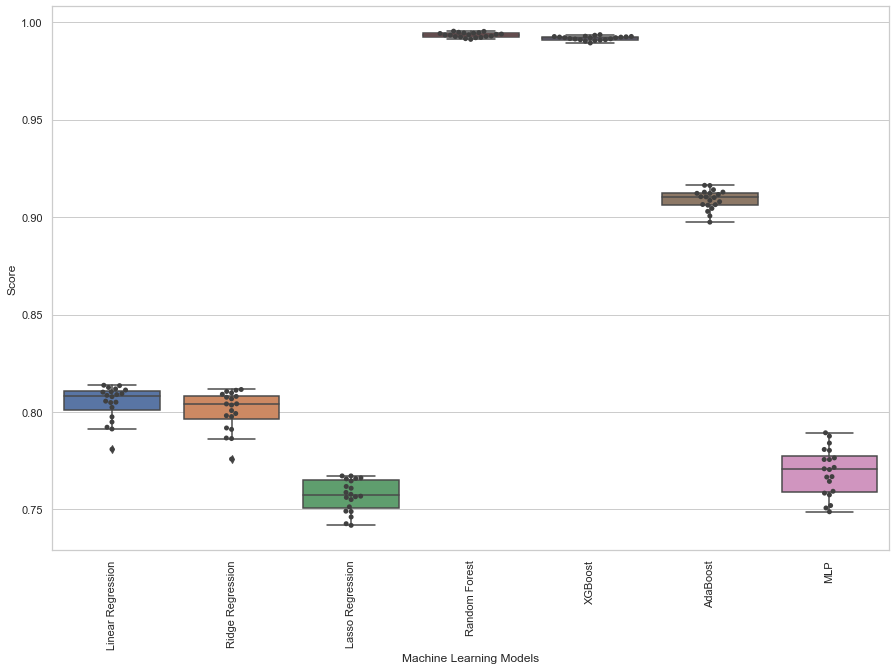

线性回归系数：
 [ 3.3890e+00  4.9720e+00 -3.9440e+00 -1.0000e-03 -1.0000e-03 -8.3700e-01
  5.3320e+00 -8.5300e-01 -1.1810e+00  1.3031e+01 -1.0892e+01  2.6480e+00
 -4.1550e+00  1.6880e+00 -1.3726e+01  1.8040e+00 -1.2550e+00 -9.0114e+01
 -1.8490e+01 -3.9057e+01  4.4040e+00  2.4700e-01  4.6848e+01]
Training set score:0.8379664842

Test set score:-1.6478488369

Training set MSE:61.54

Test set MSE:125.75



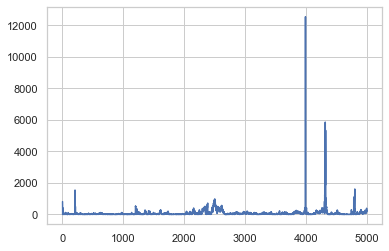

Train RMSE: 7.8450
Test RMSE: 11.2137


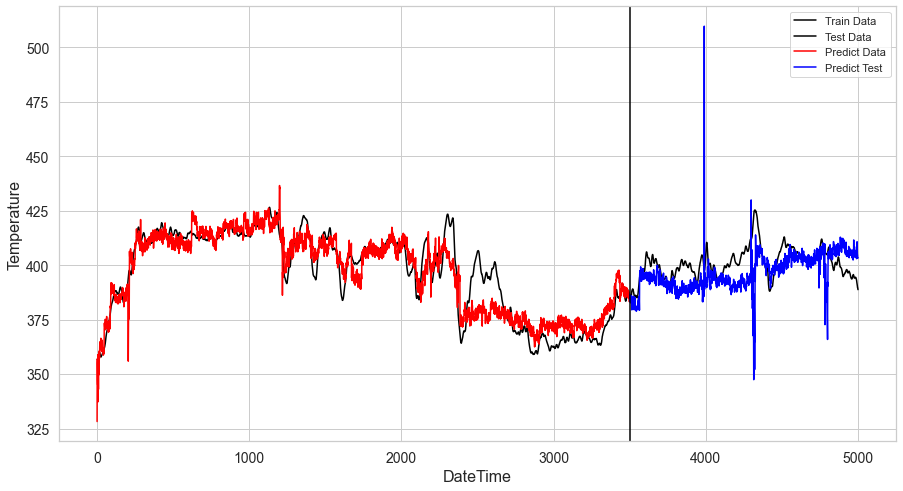

Linear Regression : [0.86538417 0.85975413 0.8600494  0.85289432 0.86362552 0.87170004
 0.84655197 0.86779847 0.8625928  0.85578709 0.81338035 0.86107329
 0.83866109 0.82500644 0.86805573 0.85959022 0.85290839 0.85581038
 0.80596396 0.87091642]
Ridge Regression : [0.86061565 0.85701404 0.85687609 0.8476539  0.85970033 0.86918199
 0.83926877 0.86542235 0.85965435 0.85185078 0.7981914  0.85766353
 0.82927526 0.81463436 0.86272736 0.85554104 0.84746483 0.84962137
 0.78786124 0.86907048]
Lasso Regression : [0.73580381 0.75140081 0.73703181 0.74211002 0.74479197 0.74483368
 0.72563197 0.73815323 0.74846443 0.73162487 0.73544657 0.73477821
 0.73162047 0.7207696  0.73992345 0.73357988 0.72213853 0.72282139
 0.73651596 0.74244884]
Random Forest : [0.99652467 0.99677354 0.9961941  0.99663479 0.99754989 0.99645812
 0.99704212 0.99638553 0.99644264 0.99708945 0.99700598 0.99738316
 0.996819   0.99582672 0.99712756 0.9959601  0.99714655 0.9969172
 0.99650407 0.99608465]
XGBoost : [0.9935612  0.993

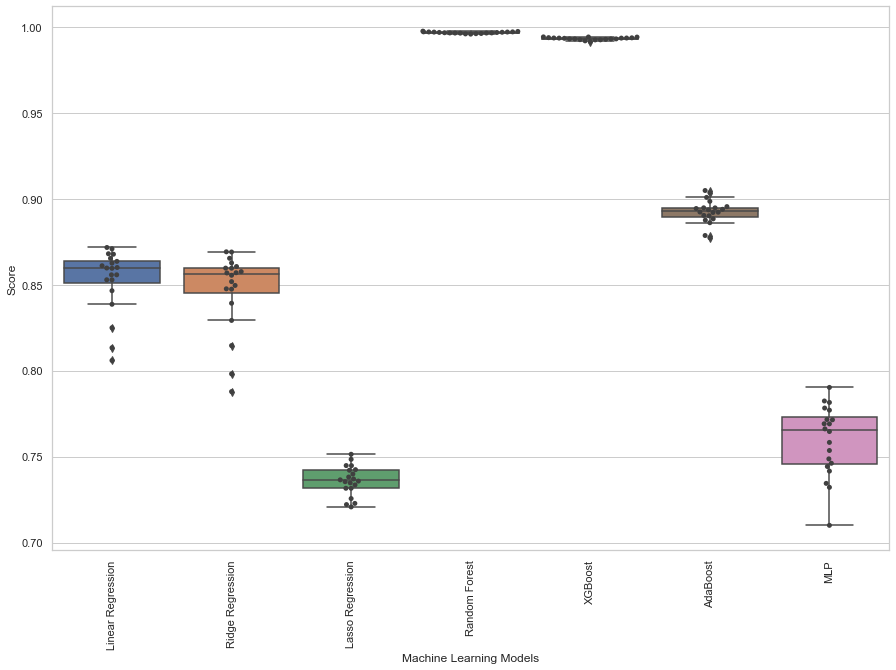

线性回归系数：
 [ 4.4600e-01  2.7890e+00 -2.9220e+00  5.0000e-03  5.0000e-03 -1.1600e+00
  4.9300e-01 -2.7400e-01 -5.5400e-01  8.3300e-01  5.1900e-01 -3.6400e-01
 -1.8670e+00  2.6600e+00 -6.2400e+00  2.7200e-01  5.4760e+00 -2.5610e+01
 -1.5983e+01  1.7005e+01 -1.1400e+00  4.2900e-01  5.6000e+00]
Training set score:0.8782379807

Test set score:0.1998582104

Training set MSE:16.88

Test set MSE:41.79



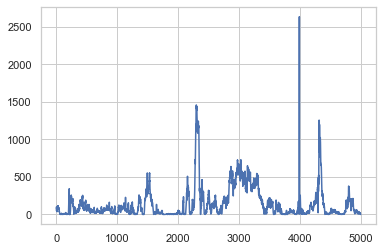

Train RMSE: 4.1082
Test RMSE: 6.4646


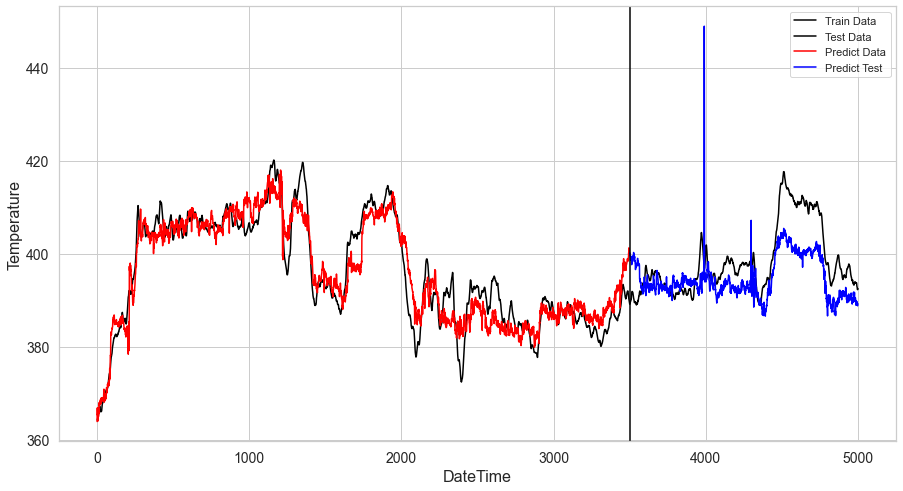

Linear Regression : [0.94647843 0.94391339 0.94199309 0.94482332 0.94635358 0.94724161
 0.94624047 0.94561385 0.94376057 0.94461384 0.93808765 0.94510489
 0.94188905 0.94468807 0.94924612 0.94226086 0.9467009  0.94560314
 0.94192451 0.94832239]
Ridge Regression : [0.94668781 0.94295928 0.94115255 0.94470148 0.9454861  0.94713947
 0.945693   0.94515974 0.94330373 0.94398863 0.9386115  0.944956
 0.94202544 0.94460179 0.9492184  0.9423493  0.94700442 0.94472557
 0.9425304  0.9477135 ]
Lasso Regression : [0.90026106 0.89948808 0.89044911 0.90255269 0.8952098  0.90015157
 0.90263849 0.89932514 0.90127087 0.89800321 0.89704031 0.90238529
 0.89858429 0.90410954 0.90641324 0.89438898 0.90447935 0.90083123
 0.90180242 0.90261453]
Random Forest : [0.9974898  0.99788148 0.99771745 0.9981278  0.99826774 0.99788869
 0.99819163 0.99840349 0.99801476 0.99821997 0.99722491 0.99829597
 0.99822662 0.99771425 0.99837302 0.99692296 0.99849988 0.99824178
 0.9976699  0.9977235 ]
XGBoost : [0.99629438 0.9969

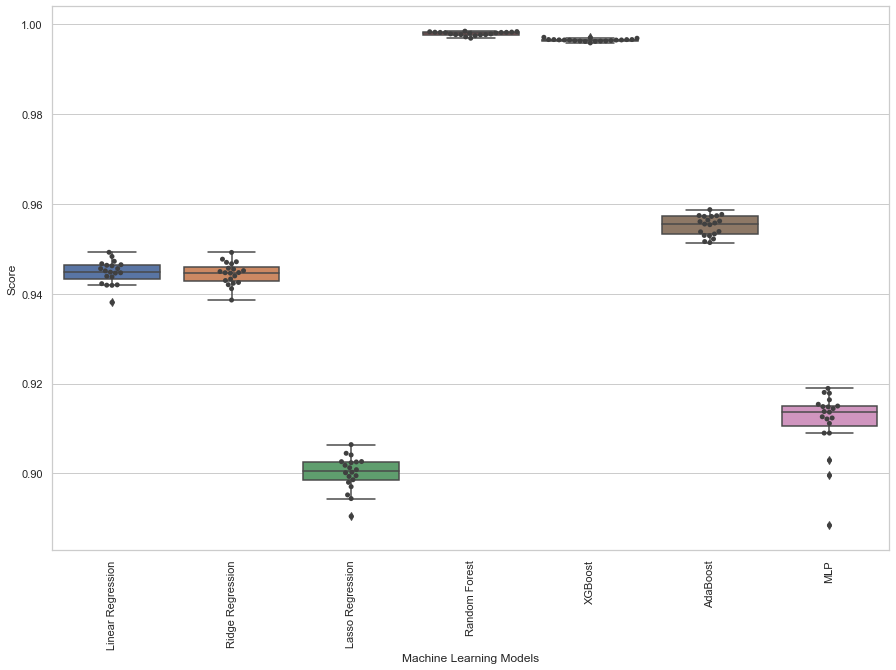

线性回归系数：
 [ 1.5220e+00  1.1840e+00 -1.6000e+00 -2.9000e-02 -2.9000e-02 -2.5620e+00
  2.2080e+00 -6.9200e-01 -1.4500e-01 -1.8120e+00  2.3950e+00 -2.7220e+00
  1.1200e-01  1.4670e+00  3.6670e+00 -7.5000e-02  6.5930e+00 -3.3505e+01
 -2.3966e+01  5.0460e+00 -3.8500e-01  2.3700e-01 -8.9670e+00]
Training set score:0.9565471316

Test set score:-0.3764059236

Training set MSE:15.93

Test set MSE:50.78



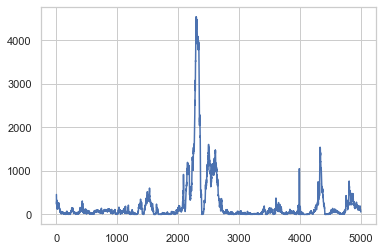

Train RMSE: 3.9913
Test RMSE: 7.1259


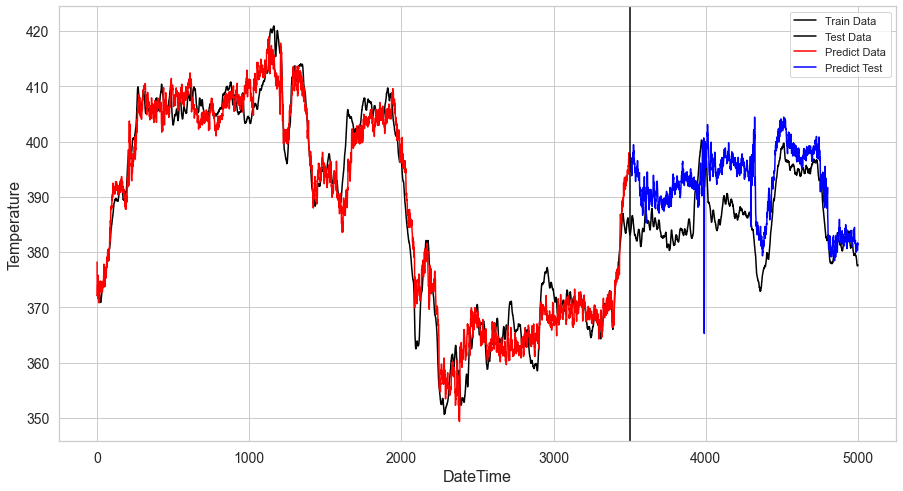

Linear Regression : [0.93809538 0.93455344 0.93500147 0.93656238 0.9375733  0.93863584
 0.93427293 0.94084725 0.93561431 0.93473542 0.92308997 0.93608202
 0.93122628 0.93011837 0.94097163 0.93354584 0.9379611  0.93510703
 0.92435975 0.9405932 ]
Ridge Regression : [0.93784237 0.93484917 0.93496057 0.93630117 0.93759231 0.93846349
 0.93400649 0.94079052 0.93565908 0.93481929 0.92276201 0.93605685
 0.93111736 0.92988826 0.94080045 0.93338195 0.93782587 0.93488204
 0.92395334 0.94084258]
Lasso Regression : [0.87764462 0.88239445 0.87286408 0.88371902 0.87621693 0.8817918
 0.87630135 0.88373124 0.88637105 0.87889302 0.87827991 0.88074773
 0.88124821 0.88319296 0.88487519 0.87528849 0.88523965 0.87988465
 0.87902876 0.88481266]
Random Forest : [0.99718075 0.99736484 0.99733146 0.99719759 0.99730348 0.99709868
 0.99731623 0.99717764 0.99767461 0.99774564 0.99775434 0.99724861
 0.99749115 0.99724435 0.99751167 0.99629613 0.99706616 0.9972118
 0.99765277 0.99676026]
XGBoost : [0.99521884 0.9953

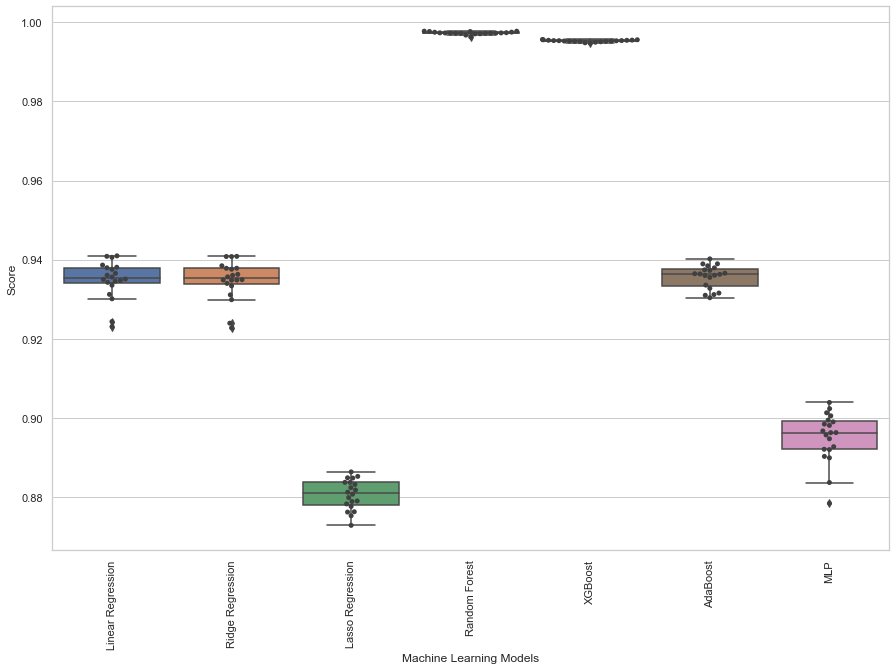

线性回归系数：
 [  0.627   1.142  -1.501   0.028   0.028  -2.259   2.131  -0.526   0.121
  -0.646   0.749  -2.47   -1.384   2.834   0.519  -0.04    4.13   -2.821
 -20.291   9.499  -1.277   0.359  -0.748]
Training set score:0.9572617105

Test set score:0.3073509745

Training set MSE:9.63

Test set MSE:23.05



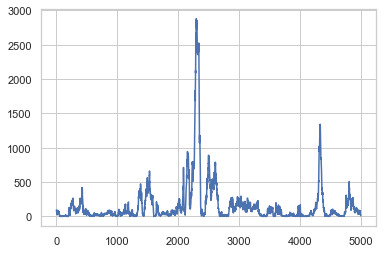

Train RMSE: 3.1030
Test RMSE: 4.8010


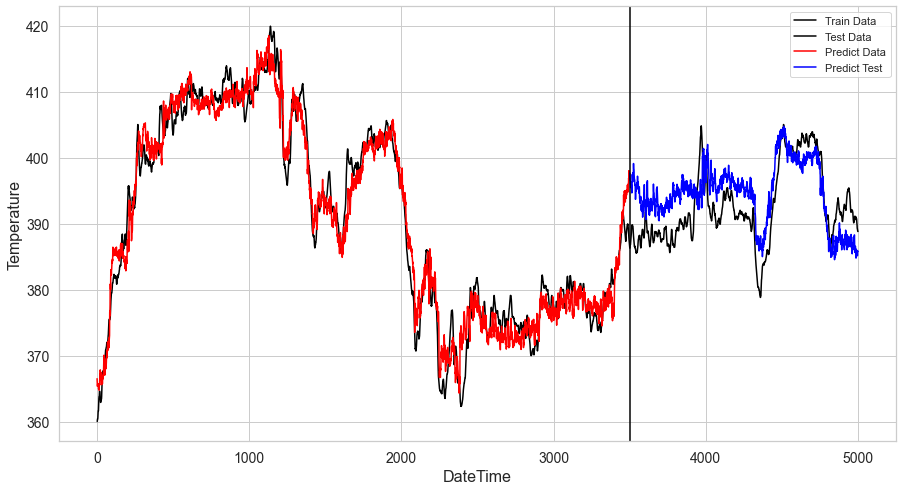

Linear Regression : [0.92670931 0.92420062 0.92552521 0.9278572  0.93013831 0.93200249
 0.92898574 0.93089827 0.92705296 0.92765565 0.92133363 0.92677438
 0.92356482 0.92966514 0.93320492 0.92344468 0.93127451 0.92693159
 0.92525076 0.93191055]
Ridge Regression : [0.92681859 0.92406546 0.92525264 0.92796621 0.92996397 0.93205147
 0.92890199 0.93097115 0.92722675 0.92754338 0.92171659 0.92677527
 0.92405015 0.929951   0.93366585 0.92347298 0.93146301 0.92665525
 0.92564135 0.93191168]
Lasso Regression : [0.87265835 0.87735264 0.86739854 0.88206561 0.87528094 0.88465638
 0.88024398 0.88258221 0.88510201 0.88074479 0.87872674 0.87775754
 0.87894974 0.88813001 0.88976463 0.87412095 0.88729441 0.8792954
 0.87971962 0.88287218]
Random Forest : [0.99601893 0.99700005 0.99564034 0.99638917 0.99737722 0.99623411
 0.99705446 0.99692223 0.99653388 0.99693588 0.99625955 0.99604743
 0.99657474 0.99671891 0.9975207  0.99614977 0.99688686 0.99619173
 0.99561409 0.99645276]
XGBoost : [0.99440345 0.995

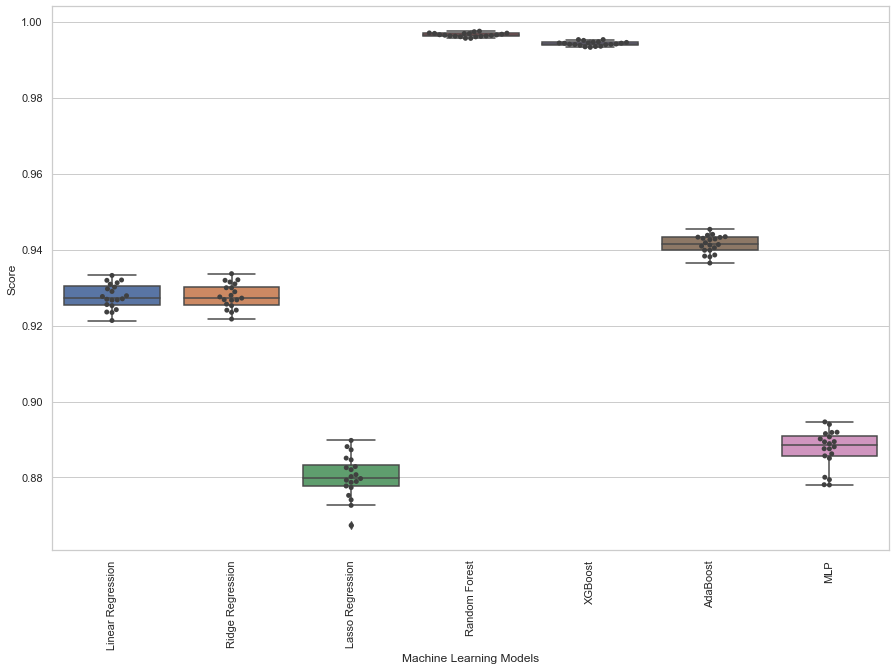

线性回归系数：
 [ 1.0800e+00  1.5670e+00 -2.0680e+00 -5.0000e-03 -5.0000e-03 -2.9850e+00
  2.9170e+00 -7.7400e-01  4.3000e-02 -1.3490e+00  1.4650e+00 -2.3260e+00
 -1.2080e+00  1.8860e+00  4.0990e+00  1.7100e-01  5.0650e+00 -1.6172e+01
 -2.5852e+01 -2.7330e+00 -5.4700e-01  4.4100e-01 -9.2900e-01]
Training set score:0.9456633704

Test set score:0.0613778976

Training set MSE:20.00

Test set MSE:61.44



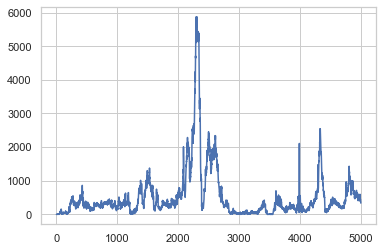

Train RMSE: 4.4717
Test RMSE: 7.8382


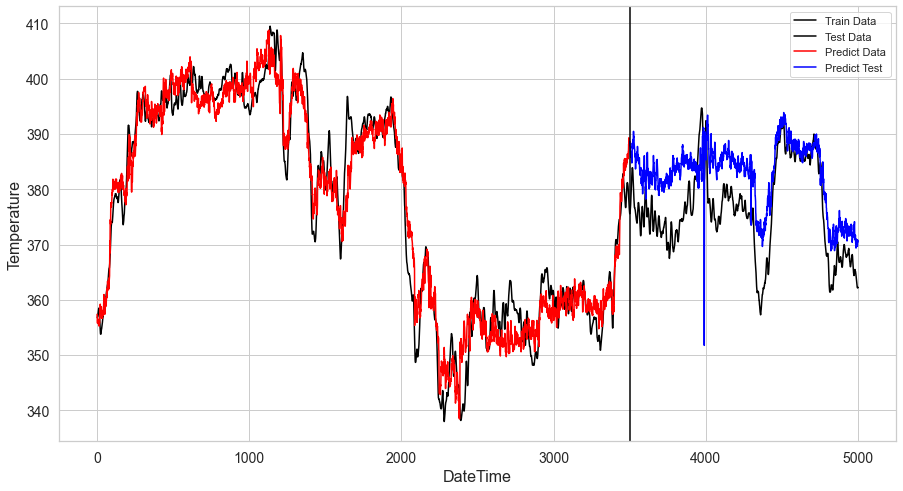

Linear Regression : [0.92849877 0.93642421 0.92716929 0.93189496 0.93100363 0.93503268
 0.92888399 0.937493   0.93363968 0.92559811 0.92848141 0.9288733
 0.93122094 0.92702882 0.93335718 0.92992852 0.92878914 0.93054247
 0.92977879 0.93190225]
Ridge Regression : [0.92816231 0.9366153  0.92759059 0.93174395 0.93053799 0.93476438
 0.92830938 0.93694751 0.93359211 0.92536578 0.92752509 0.92853251
 0.93062352 0.92666263 0.93332474 0.93006809 0.92830109 0.93015708
 0.92862823 0.93170448]
Lasso Regression : [0.89910385 0.90955504 0.90123472 0.90567672 0.90394473 0.90823764
 0.90108808 0.91112699 0.90900173 0.89851365 0.90590742 0.90280731
 0.90512965 0.90226467 0.91075234 0.90572603 0.90323895 0.9060595
 0.90339778 0.90626357]
Random Forest : [0.99706084 0.99652385 0.99645535 0.9970667  0.99712887 0.99714312
 0.99746412 0.99676926 0.99781559 0.99707292 0.99699864 0.99720432
 0.99711586 0.99714004 0.99775312 0.99755626 0.9974146  0.9976892
 0.99716198 0.99771678]
XGBoost : [0.99514493 0.99613

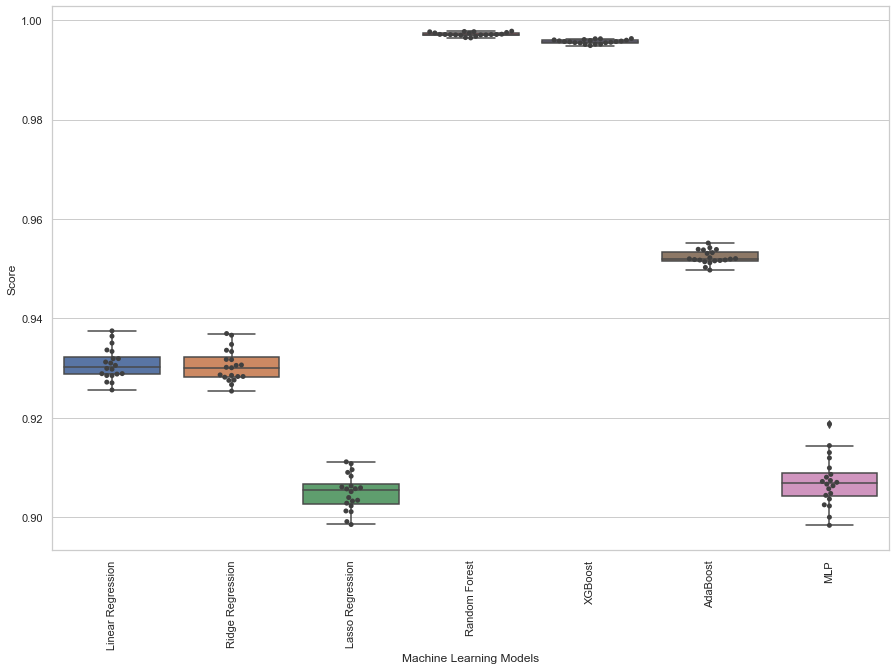

线性回归系数：
 [  0.243   0.257  -0.462   0.075   0.075  -1.883   2.525   0.043  -0.024
  -2.677   2.554  -2.156   0.743   0.156   0.847   0.429   2.436  10.488
 -17.864  22.156  -1.422   0.731 -17.346]
Training set score:0.9582162190

Test set score:-0.1973578904

Training set MSE:14.15

Test set MSE:61.77



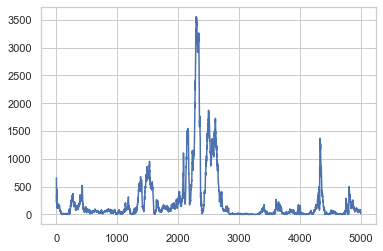

Train RMSE: 3.7616
Test RMSE: 7.8594


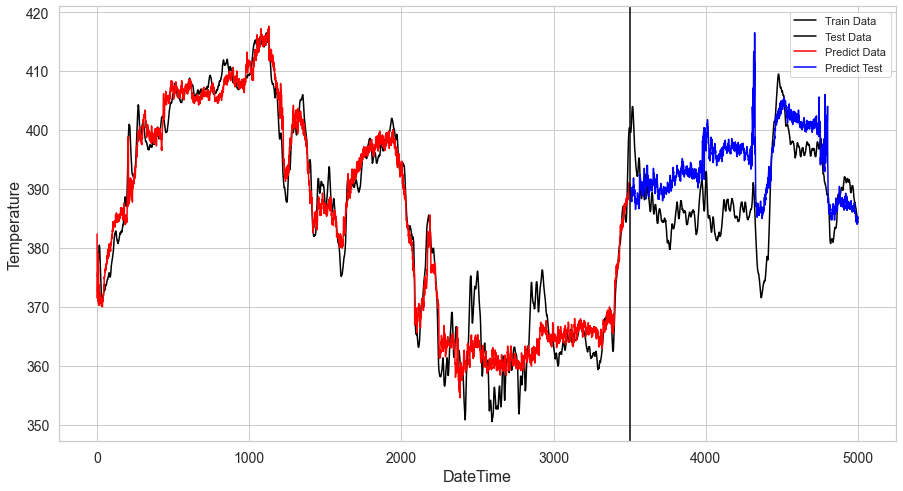

Linear Regression : [0.95888847 0.95716853 0.9566676  0.95681805 0.95441173 0.95602544
 0.95347879 0.95838771 0.95408474 0.95312877 0.94974287 0.95365487
 0.9543932  0.94936382 0.956048   0.95511832 0.95605379 0.95519111
 0.94526281 0.95465241]
Ridge Regression : [0.95754816 0.95667586 0.95537262 0.95593972 0.953455   0.95492385
 0.95194137 0.95799878 0.95393486 0.95283245 0.94683321 0.95303352
 0.95224547 0.94769357 0.95442703 0.95502436 0.95448069 0.95481942
 0.94241515 0.95379715]
Lasso Regression : [0.93396187 0.9366378  0.93441756 0.93325802 0.93247624 0.93234969
 0.93386568 0.93513156 0.93655091 0.93049787 0.93539996 0.93091472
 0.93481818 0.93245178 0.93585557 0.93165907 0.93359015 0.93683937
 0.93395876 0.93470423]
Random Forest : [0.99405587 0.99438834 0.99461375 0.99474278 0.99400324 0.99409945
 0.99494    0.99453214 0.99403395 0.99361548 0.9946179  0.99346239
 0.99423154 0.99426087 0.99300274 0.9944812  0.99468689 0.99376103
 0.99302137 0.99382279]
XGBoost : [0.99419152 0.99

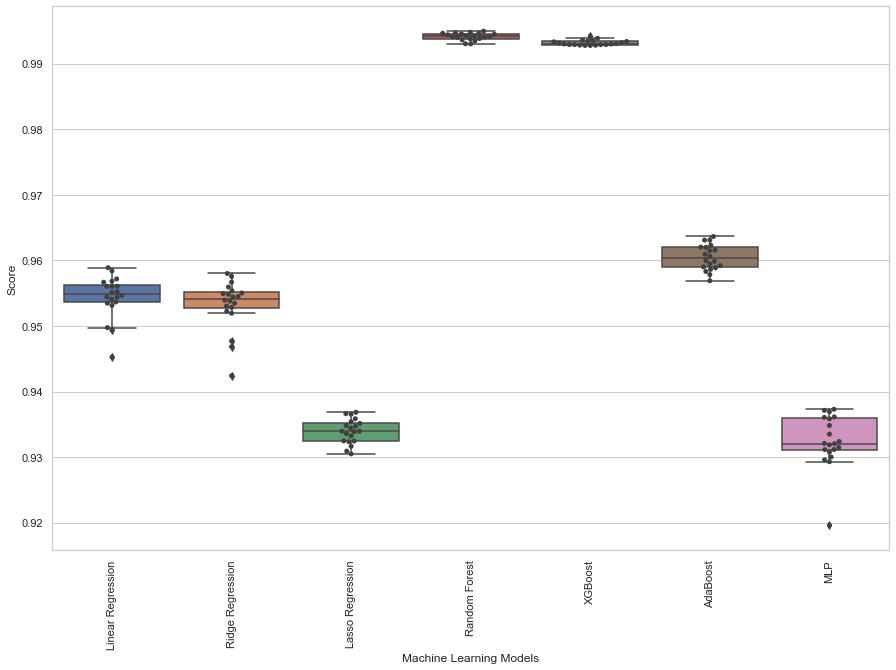

线性回归系数：
 [-0.568 -0.22  -0.119  0.056  0.056 -0.086  0.848 -0.227 -0.363 -0.082
  0.354  0.708 -1.755  0.77  -2.016  0.249  2.592 34.939 -6.93  17.247
 -1.354  0.277 -1.46 ]
Training set score:0.9688422432

Test set score:0.5697123539

Training set MSE:12.30

Test set MSE:27.73



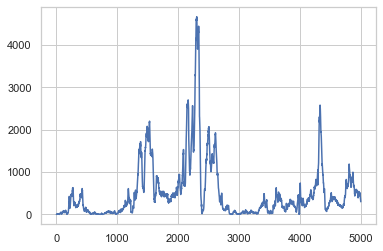

Train RMSE: 3.5069
Test RMSE: 5.2663


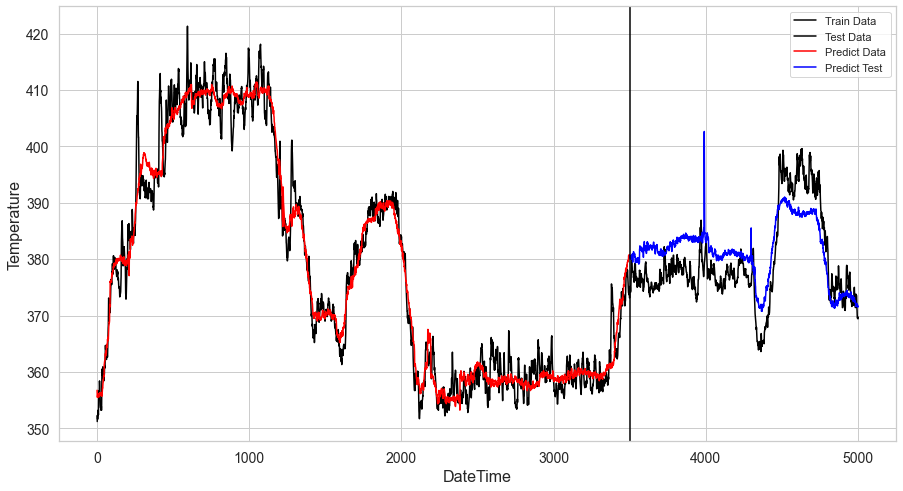

Linear Regression : [0.8779337  0.88156279 0.86985289 0.88424354 0.88597375 0.88403391
 0.8748855  0.88490081 0.87409947 0.88106785 0.88082716 0.87807244
 0.87714005 0.87661121 0.88033307 0.88055006 0.87189658 0.87348417
 0.87865076 0.8810086 ]
Ridge Regression : [0.87786372 0.8815383  0.87126627 0.88386194 0.88586186 0.88343046
 0.87520455 0.88448623 0.87366936 0.88150391 0.87995805 0.8784417
 0.87707562 0.87625272 0.88039546 0.88008894 0.87111095 0.87298455
 0.87783483 0.8814037 ]
Lasso Regression : [0.82931966 0.82928118 0.83038406 0.83293155 0.83597974 0.83425155
 0.82755843 0.83184297 0.83144577 0.84186978 0.83346111 0.83052453
 0.83393192 0.82823633 0.83020362 0.83452266 0.82431048 0.82430979
 0.83601912 0.83897744]
Random Forest : [0.99421762 0.99633938 0.99582514 0.99458195 0.9966009  0.99481973
 0.9962995  0.99466298 0.99516143 0.99641193 0.99622087 0.9944971
 0.99617732 0.9957801  0.99524772 0.99446704 0.99423698 0.99512777
 0.9956161  0.99521827]
XGBoost : [0.99390145 0.9939

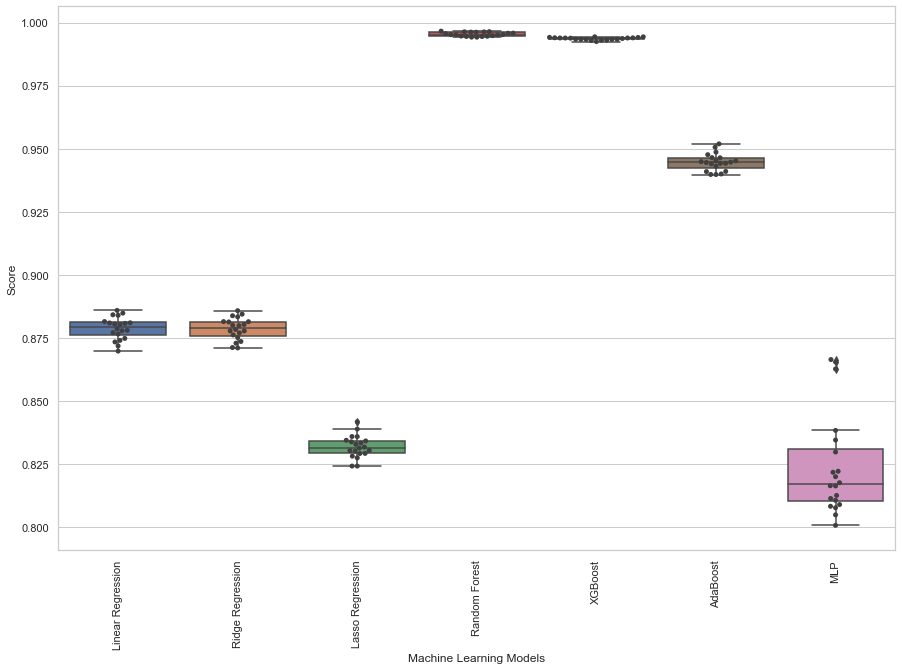

线性回归系数：
 [ -0.097  -0.097  -0.184   0.136   0.136  -2.165   2.438   0.737   0.383
  -1.597   0.546  -0.283  -0.804   0.277  -1.881   1.334   2.269 -14.112
 -29.689  19.075  -1.243   1.045  -9.862]
Training set score:0.8635792875

Test set score:-1.9822866863

Training set MSE:21.11

Test set MSE:339.12



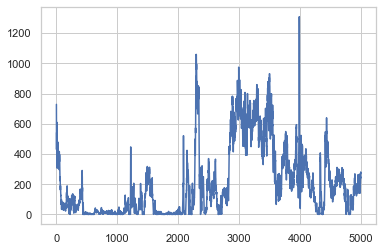

Train RMSE: 4.5943
Test RMSE: 18.4153


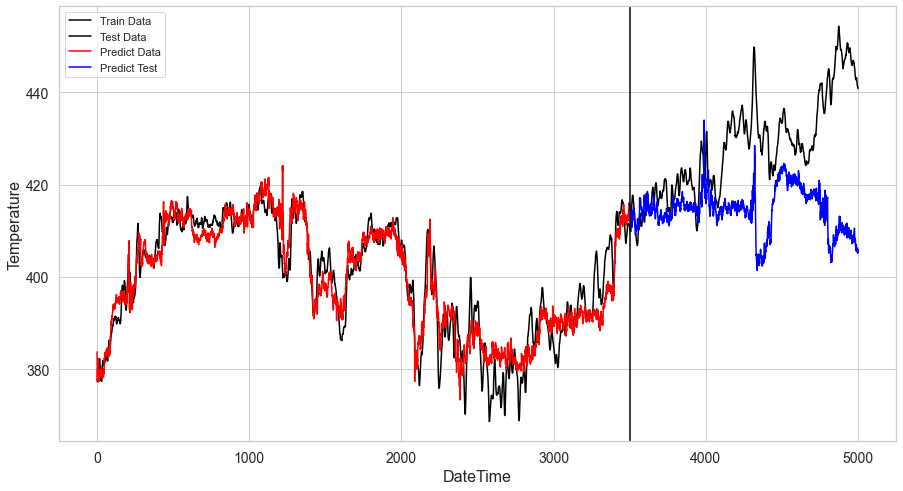

Linear Regression : [0.75898355 0.74646601 0.72919154 0.75776547 0.75546761 0.76300732
 0.7479565  0.77242949 0.73460161 0.73946577 0.74977458 0.74337729
 0.74831814 0.7398457  0.75141554 0.75757284 0.74157711 0.73920099
 0.73195465 0.73140836]
Ridge Regression : [0.75618366 0.74585556 0.7297333  0.75749565 0.7539421  0.76337604
 0.7483565  0.77201232 0.73609853 0.73916306 0.75464529 0.74166204
 0.7508092  0.74162899 0.75077425 0.75692348 0.74008856 0.73853929
 0.73297487 0.73089907]
Lasso Regression : [0.57366504 0.5688694  0.58576742 0.59739062 0.59263472 0.60872801
 0.58899168 0.60387572 0.58532531 0.59521307 0.6006427  0.58634636
 0.61030255 0.58326887 0.57548215 0.60533757 0.57740021 0.58168136
 0.572761   0.58246222]
Random Forest : [0.99137383 0.99133011 0.98997568 0.99158407 0.99020839 0.99059236
 0.99082734 0.9919613  0.98966577 0.99052229 0.98952266 0.99044894
 0.99162356 0.99061185 0.99137337 0.99055842 0.98616779 0.99235629
 0.99037043 0.99038603]
XGBoost : [0.9883015  0.98

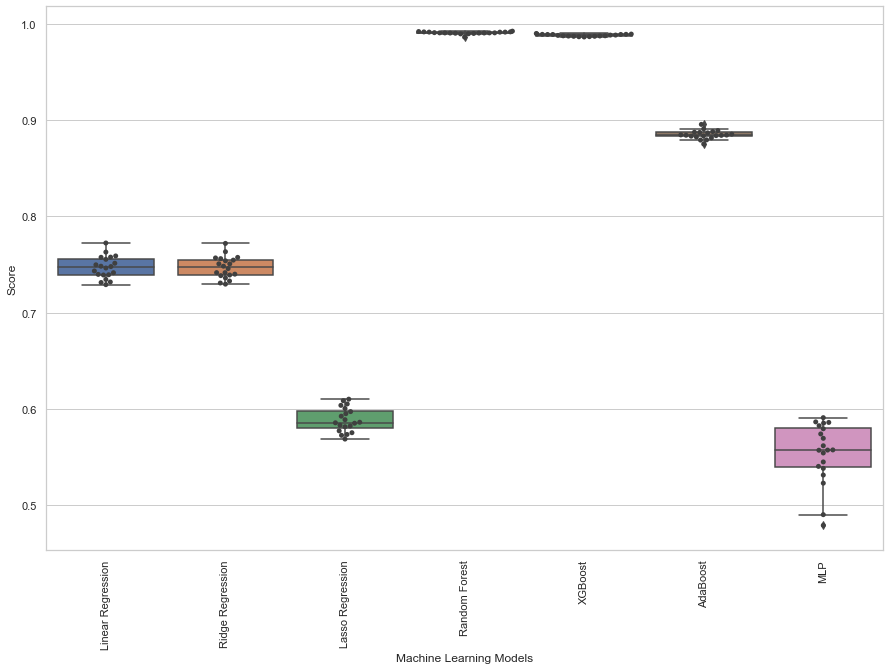

线性回归系数：
 [ -0.667   1.667  -2.336   0.201   0.201  -6.183   5.336   0.939   1.504
  -8.01    4.75   -0.68   -0.425  -3.56    3.909   1.137   7.285 -17.305
 -93.975   1.035  -2.63    0.698  12.07 ]
Training set score:0.6151675057

Test set score:-6.6630311667

Training set MSE:101.65

Test set MSE:209.52



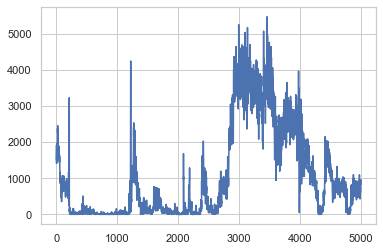

Train RMSE: 10.0820
Test RMSE: 14.4747


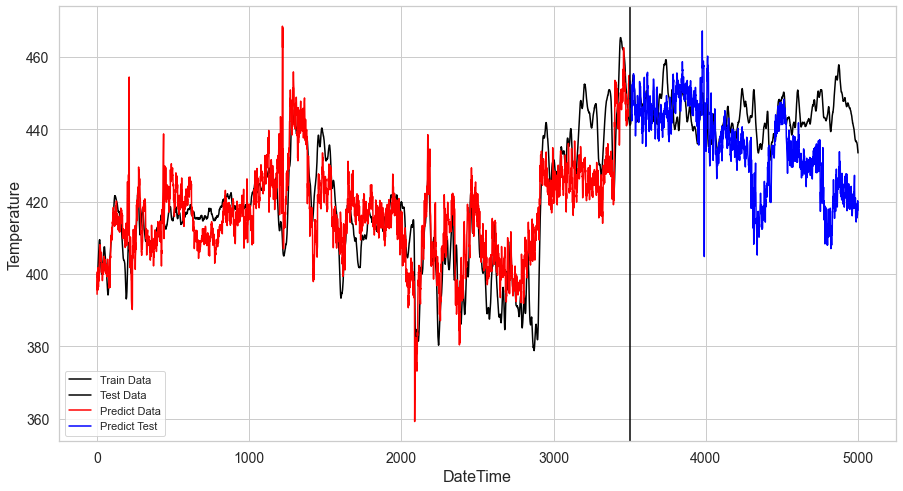

In [104]:
# 建立模型

# 划分数据集(可能需要按照时间顺序划分Train、Test)
# X_train,X_test,y_train,y_test = train_test_split(X_newdata,Y_data.iloc[:,1],random_state=200,test_size=0.7)

#划分训练集(按照时间划分)
for i in range(len(Y_data.columns)): # 循环10个管道
    index = X_newdata.index[int(len(X_newdata)*0.7)]

    X_train = X_newdata[:int(len(X_newdata)*0.7)+1]
    X_test = X_newdata[int(len(X_newdata)*0.7):]
    y_train = Y_data.iloc[:,i][:int(len(Y_data.iloc[:,i])*0.7)+1]
    y_test = Y_data.iloc[:,i][int(len(Y_data.iloc[:,i])*0.7):]

        
    # 各个模型的交叉验证
    models = {
        "Linear Regression":LinearRegression(),
        "Ridge Regression":Ridge(),
        "Lasso Regression":Lasso(),
        "Random Forest":RandomForestRegressor(),
        "XGBoost":XGBRegressor(),
        "AdaBoost":AdaBoostRegressor(),
        "MLP":MLPRegressor() }
    scores_dict = {}
    for name,model in models.items():

        cv = ShuffleSplit(n_splits=10, test_size=.3, random_state=0) 
        scores_CV = cross_val_score(model, X_newdata, Y_data.iloc[:,i], cv=cv)  
        print(name,":",scores_CV)
        scores_dict[name] = scores_CV  # 保存交叉验证评分结果
    df_scoresCV = pd.DataFrame(scores_dict)
    df_scoresCV.to_csv("./df_scoresCV_{}.csv".format(Y_data.columns[i]),index=False,header=True)

    
    # 可视化绘制箱线图
    score_plotdata = pd.DataFrame(scores_dict).melt()

    plt.figure(figsize=(15,10))
    sns.set(style="whitegrid", color_codes=True)
    sns.boxplot(x="variable", y="value",data=score_plotdata)
    sns.swarmplot(x="variable", y="value", data=score_plotdata, color=".25")
    plt.xticks(rotation=90)
    plt.xlabel("Machine Learning Models")
    plt.ylabel("Score")

    plt.savefig("./score_plot_cv_machine_learning_{}.png".format(Y_data.columns[i]),dpi=500, bbox_inches = "tight")
    plt.show()

    
    """线性回归"""
    lr = LinearRegression(fit_intercept=False,normalize=True,n_jobs=10).fit(X_train,y_train)
    lr_coef = np.round(lr.coef_,3)
    print("线性回归系数：\n",lr_coef)
    print('Training set score:{:.10f}\n'.format(lr.score(X_train,y_train)))
    print('Test set score:{:.10f}\n'.format(lr.score(X_test,y_test)))
    print("Training set MSE:{:.2f}\n".format(mean_squared_error(y_train,lr.predict(X_train))))
    print("Test set MSE:{:.2f}\n".format(mean_squared_error(y_test,lr.predict(X_test))))
    lr_predict = lr.predict(X_newdata)
    predict_data = pd.concat([pd.DataFrame(X_data),pd.DataFrame(Y_data,columns=["Y"]),pd.DataFrame(lr_predict,columns=["predict"])],axis=1)
    predict_data.to_csv("./predictdata_{}.csv".format(Y_data.columns[i]),index=False,header=True)


    # 残差图
    plt.plot((lr.predict(X_newdata)-Y_data.iloc[:,1])**2)
    plt.savefig("./线性回归模型拟合的残差图_{}.png".format(Y_data.columns[i]), dpi = 500, format = "png", bbox_inches = "tight")
    plt.show()

    
    
    #可视化绘制线性模型的预测效果时序图
    predict_train = lr.predict(X_train)
    predict_test = lr.predict(X_test)

    fig = plt.figure(figsize=(15,8))
    plt.plot(y_train,"black",label="Train Data")
    plt.plot(y_test,"black",label="Test Data")
    plt.plot(predict_train,"red",label = "Predict Data")
    plt.plot(range(index-1,5000),predict_test,"blue",label = "Predict Test")
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlabel("DateTime", fontsize = 16)
    plt.ylabel("Temperature", fontsize = 16)
    plt.axvline(x=index,ls="-",c="black")#添加垂直直线
    plt.legend(loc="best")
    plt.savefig("./PredictResultAll{}.png".format(Y_data.columns[i]), dpi = 500, format = "png", bbox_inches = "tight")

    print('Train RMSE: %.4f'% np.sqrt(np.sum((predict_train-y_train)**2)/y_train.size))
    print('Test RMSE: %.4f'% np.sqrt(np.sum((predict_test-y_test)**2)/y_test.size))

    plt.show()

## 4.	第10个水冷壁管道温度曲线如图2所示，从图中可以看出，在第3172个样本点后水冷壁出现明显的超温现象，请基于给出的数据，分析并定位引发超温现象的主要操作变量。




## 5.	请针对第10个水冷壁管道温度曲线超温段建立优化模型，给出该超温段从第3172个样本开始的最优调节策略，满足操控的变量数尽量少、操作变量的调控量尽量小、优化调节后的工作曲线与问题2中的最优工作曲线的特征尽量吻合。
